<a href="https://colab.research.google.com/github/ThuongNguyen168/HousePrice/blob/main/HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><p style ="color: gold; font-weight: 500">Phân tích và khám phá bộ dữ liệu House Prices</p></center>

<center>>>> Nguyễn Ngọc Trí Vĩ <<< <br>
>>> Nguyễn Bá Ngọc <<< <br>
>>> Nguyễn Thị Thương <<<

Link dataset: https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction

## <h2>Giới thiệu về bộ dữ liệu</h3>

### Thông tin về bộ dữ liệu


Bộ dữ liệu này cung cấp thông tin chi tiết để dự đoán giá nhà, với 545 dòng và 13 cột dữ liệu bao gồm các thuộc tính và thông tin như sau:

Các thuộc tính định lượng:
- Price: Giá của căn nhà. (Số nguyên)
- Area: Tổng diện tích của căn nhà tính bằng feet vuông. (Số nguyên)
- Bedrooms: Số phòng ngủ trong căn nhà. (Số nguyên)
- Bathrooms: Số phòng tắm trong căn nhà. (Số nguyên)
- Stories: Số tầng của căn nhà. (Số nguyên)
- Parking: Số chỗ đỗ xe có sẵn trong căn nhà. (Số nguyên)

Các thuộc tính phân loại:
- Mainroad: Liên kết với đường chính hay không (Có/Không).
- Guestroom: Có phòng khách cho khách hay không (Có/Không).
- Basement: Có tầng hầm hay không (Có/Không).
- Hot water heating: Có hệ thống sưởi nước nóng hay không (Có/Không).
- Airconditioning: Có hệ thống điều hòa không khí hay không (Có/Không).
- Prefarea: Căn nhà có nằm trong khu vực ưa thích hay không (Có/Không).
- Furnishing status: Tình trạng nội thất của căn nhà (Đầy đủ nội thất, Bán nội thất, Chưa có nội thất).

### Một số câu hỏi của khách hàng đưa ra

Khách hàng đặt ra những yêu cầu tìm hiểu dựa trên bộ dữ liệu như sau:


Tìm về phân phối của giá nhà:
- Câu 1: Giá nhà phân phối trong bộ dữ liệu như thế nào? Có nhiều những căn nhà giá cao hay thấp hơn?

Tìm mối tương quan giữa các biến, như thông tin về căn nhà:
- Câu 2: Liệu có mối quan hệ nào giữa diện tích của căn nhà và giá bán không?
- Câu 3: Giữa số lượng phòng ngủ và giá nhà có mối liên hệ nào không? Thống kê giá trung bình của từng số lượng phòng ngủ.
- Câu 4: Có sẵn tiện ích (máy nước nóng, điều hòa), có tầng hầm ảnh hưởng đến giá của nhà như thế nào? Từng loại tiện ích có chênh lệch trung bình với không có là bao nhiêu?
- Câu 5: Giữa nhà có đầy đủ nội thất, chưa có nội thất hoặc có một sẵn một số nội thất có giá chênh lệch nhau thế nào?

Hoặc sự ảnh hưởng của vị trí đến giá cả:
- Câu 6: Có sự chênh lệch giá nhà giữa hai khu vực yêu thích và không yêu thích không?
- Câu 7: Nhà nằm ở mặt tiền chênh lệch giá trung bình với nhà không nằm ở mặt tiền như thế nào? Và nó có ảnh hưởng trực tiếp đến giá nhà hay không?

Và đưa ra một mô hình dự đoán giá nhà dựa trên những thuộc tính có trong bộ dữ liệu.

Dựa vào các yêu cầu trên, ta có thể xác định biến phản hồi (price) là thuộc kiểu dữ liệu định lượng, ta cần đi kiểm định các giả thuyết liên quan đến các biến phản hồi thuộc kiểu dữ liệu định lượng (diện tích, số lượng phòng ngủ, ...) hoặc phân loại (máy nước nóng, điều hòa, tầng hầm, nội thất có sẵn, ...).

## <h3>Khai báo thư viện

In [ ]:
from sklearn.utils.fixes import sklearn
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import pearsonr, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.compose import ColumnTransformer

import xgboost as xgb
pd.set_option('float_format', '{:.0f}'.format)


## <h2>Đọc và xử lý bộ dữ liệu</h2>

In [ ]:
data = pd.read_csv('https://drive.google.com/uc?id=1cVWtvEZPJrx6OaDtKbHfltOD-Ue_r-VO')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### <h3>Thống kê và phân tích sơ về bộ dữ liệu</h3>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
quantity_cols = ['price','area','bedrooms','bathrooms','stories','parking']
print('Số lượng thuộc tính định lượng là:', len(quantity_cols))

Số lượng thuộc tính định lượng là: 6


In [ ]:
data[quantity_cols].describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545,545,545,545,545,545
mean,4766729,5151,3,1,2,1
std,1870440,2170,1,1,1,1
min,1750000,1650,1,1,1,0
25%,3430000,3600,2,1,1,0
50%,4340000,4600,3,1,2,0
75%,5740000,6360,3,2,2,1
max,13300000,16200,6,4,4,3


Có 6 thuộc tính định lượng, bao gồm: price, area, parking, bedrooms, bathrooms, stories

In [ ]:
categorical_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
print('Số thuộc tính phân loại là:', len(categorical_cols))

Số thuộc tính phân loại là: 7


In [ ]:
data[categorical_cols].describe()


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


Có 7 thuộc tính phân loại, bao gồm: mainroad, guestroom, basement,  hotwaterheating, airconditioning, prefarea, furnishingstatus

Trong đó, mainroad, guestroom, basement,  hotwaterheating, airconditioning, prefarea chỉ có 2 giá trị (Có[Yes]/Không[No]), còn furnishingstatus có 3 giá trị (Đầy đủ nội thất[furnished], Bán nội thất [semi-furnished], Chưa có nội thất[unfurnished])

In [ ]:
# Thống kê tần số cho các thuộc tính phân loại
for col in categorical_cols:
    bangTanSo = data[col].value_counts()
    print(f"\nTần số cho thuộc tính {col}:")
    for i in data[col].unique():
        print(f"{i}  :  {bangTanSo[i]}      -- Tỉ lệ: {bangTanSo[i]}/{bangTanSo.sum()}  ({(bangTanSo[i]/bangTanSo.sum())*100:.2f}%)")

for col in quantity_cols[2:]:
    bangTanSo = data[col].value_counts()
    print(f"\nTần số cho thuộc tính {col}:")
    for i in data[col].unique():
        print(f"{i}  :  {bangTanSo[i]}      -- Tỉ lệ: {bangTanSo[i]}/{bangTanSo.sum()}  ({(bangTanSo[i]/bangTanSo.sum())*100:.2f}%)")


Tần số cho thuộc tính mainroad:
yes  :  468      -- Tỉ lệ: 468/545  (85.87%)
no  :  77      -- Tỉ lệ: 77/545  (14.13%)

Tần số cho thuộc tính guestroom:
no  :  448      -- Tỉ lệ: 448/545  (82.20%)
yes  :  97      -- Tỉ lệ: 97/545  (17.80%)

Tần số cho thuộc tính basement:
no  :  354      -- Tỉ lệ: 354/545  (64.95%)
yes  :  191      -- Tỉ lệ: 191/545  (35.05%)

Tần số cho thuộc tính hotwaterheating:
no  :  520      -- Tỉ lệ: 520/545  (95.41%)
yes  :  25      -- Tỉ lệ: 25/545  (4.59%)

Tần số cho thuộc tính airconditioning:
yes  :  172      -- Tỉ lệ: 172/545  (31.56%)
no  :  373      -- Tỉ lệ: 373/545  (68.44%)

Tần số cho thuộc tính prefarea:
yes  :  128      -- Tỉ lệ: 128/545  (23.49%)
no  :  417      -- Tỉ lệ: 417/545  (76.51%)

Tần số cho thuộc tính furnishingstatus:
furnished  :  140      -- Tỉ lệ: 140/545  (25.69%)
semi-furnished  :  227      -- Tỉ lệ: 227/545  (41.65%)
unfurnished  :  178      -- Tỉ lệ: 178/545  (32.66%)

Tần số cho thu

Thống kê tần số cho các thuộc tính phân loại.

Dựa vào thống kê tần số trên, ta thấy thuộc tính mainroad (vị trí nhà này có nằm ở mặt tiền, đường chính hay không?) có 545 dòng dữ liệu, thuộc kiểu string và trong đó có 2 unique value là yes, no, trong đó, yes chiếm 468/545 (khoảng 86%) và no chiếm 77/545 (khoảng 14%)


Dựa vào thống kê tần số, thuộc tính 'bedrooms' (số lượng phòng ngủ trong căn nhà) có tổng cộng 545 mẫu dữ liệu. Có các giá trị duy nhất sau đây và tần số của chúng:

- 1 phòng ngủ: 2 mẫu (chiếm khoảng 0.37%)
- 2 phòng ngủ: 136 mẫu (chiếm khoảng 25%)
- 3 phòng ngủ: 300 mẫu (chiếm khoảng 55%)
- 4 phòng ngủ: 95 mẫu (chiếm khoảng 17%)
- 5 phòng ngủ: 10 mẫu (chiếm khoảng 2%)
- 6 phòng ngủ: 2 mẫu (chiếm khoảng 0.37%)



Đối với biến 'airconditioning', dựa vào thống kê tần số, thuộc tính 'airconditioning' (có hệ thống điều hòa không khí trong căn nhà hay không) có tổng cộng 545 mẫu dữ liệu. Có các giá trị duy nhất sau đây và tần số của chúng:

Có hệ thống điều hòa: 172 mẫu (chiếm khoảng 32%)
Không có hệ thống điều hòa: 373 mẫu (chiếm khoảng 68%)

..., tương tự với các biến còn lại.

Từ đây ta thấy đa số căn nhà trong bộ dữ liệu đều nằm ở mặt tiền đường (85,87%) và nằm ở khu vực không được yêu thích là chủ yếu (76.51%) và các tiện ích của căn nhà còn lại như máy điều hòa, máy nước nóng hay thuộc tính của căn nhà như phòng khách, tầng hầm đa phần đều không có.

Ngoài ra tình trạng nội thất của căn nhà chủ yếu là bán nội thất và chưa nội thất là nhiều nhất (tổng khoảng 74%), số lượng nhà được nội thất đầy đủ trong bộ dữ liệu không nhiều.

In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Và tập dữ liệu này không có giá trị thiếu nên không cần xử lý giá trị null

### <h3>Tiền xử lý dữ liệu</h3>

Mã hóa biến phân loại bằng map

In [ ]:
data['furnishingstatus'] = data['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})
data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
data['basement'] = data['basement'].map({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})

Chuyển dữ liệu phân loại dạng chữ thành dạng số bằng Lable Encoder

In [ ]:
labelEncoder = LabelEncoder()
for i in categorical_cols:
  data[i] = labelEncoder.fit_transform(data[i])

Hoặc chuyển dữ liệu phân loại dạng chữ thành dạng số bằng OneHotEncoder

In [ ]:
feature_cat = data.select_dtypes(include='object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), feature_cat)
    ],
    remainder='passthrough'
)

Biến kiểu của các cột phân loại lại thành kiểu object thay vì int sau khi dùng Label Encoder

In [ ]:
# data[categorical_cols] = data[categorical_cols].astype(dtype='object')

Gộp cột bedrooms và bathrooms thành total rooms

In [ ]:
# data['total rooms'] = data['bedrooms'] + data['bathrooms']

In [ ]:
# columns_to_drop = ['bedrooms', 'bathrooms']
# data = data.drop(columns=columns_to_drop)
# for col in columns_to_drop:
#   categorical_cols.remove(col)

Chuẩn hóa dữ liệu định lượng bằng MinMaxScaler và StandardScaler

In [ ]:
# minmax = MinMaxScaler()
# scaler = StandardScaler()
# data['area'] = scaler.fit_transform(data['area'].values.reshape(-1,1))

In [ ]:
# data[quantity_cols] = np.log1p(data[quantity_cols])

Bỏ bớt những giá trị giá lớn hơn 10000000

In [ ]:
# data.drop(index = data[data['price'] > 10000000].index,inplace=True)

## <h2>Trực quan hóa và phân tích bộ dữ liệu</h2>

### <h3>Trực quan hóa dữ liệu</h3>

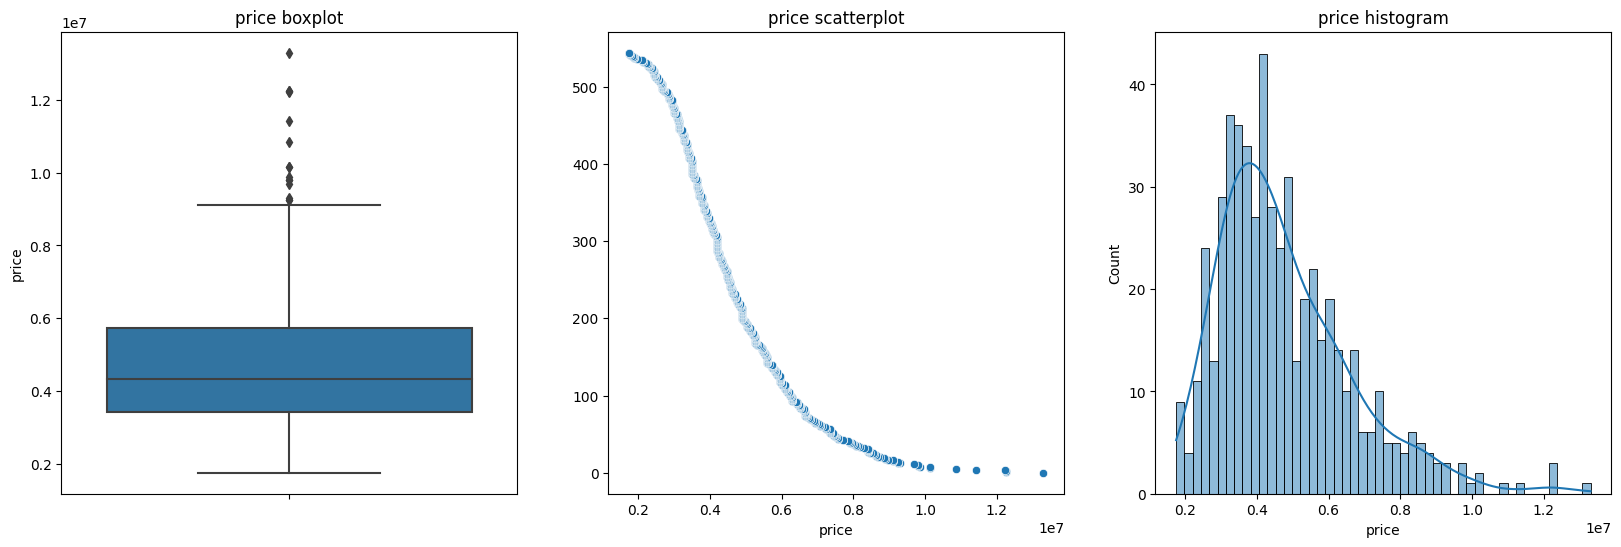

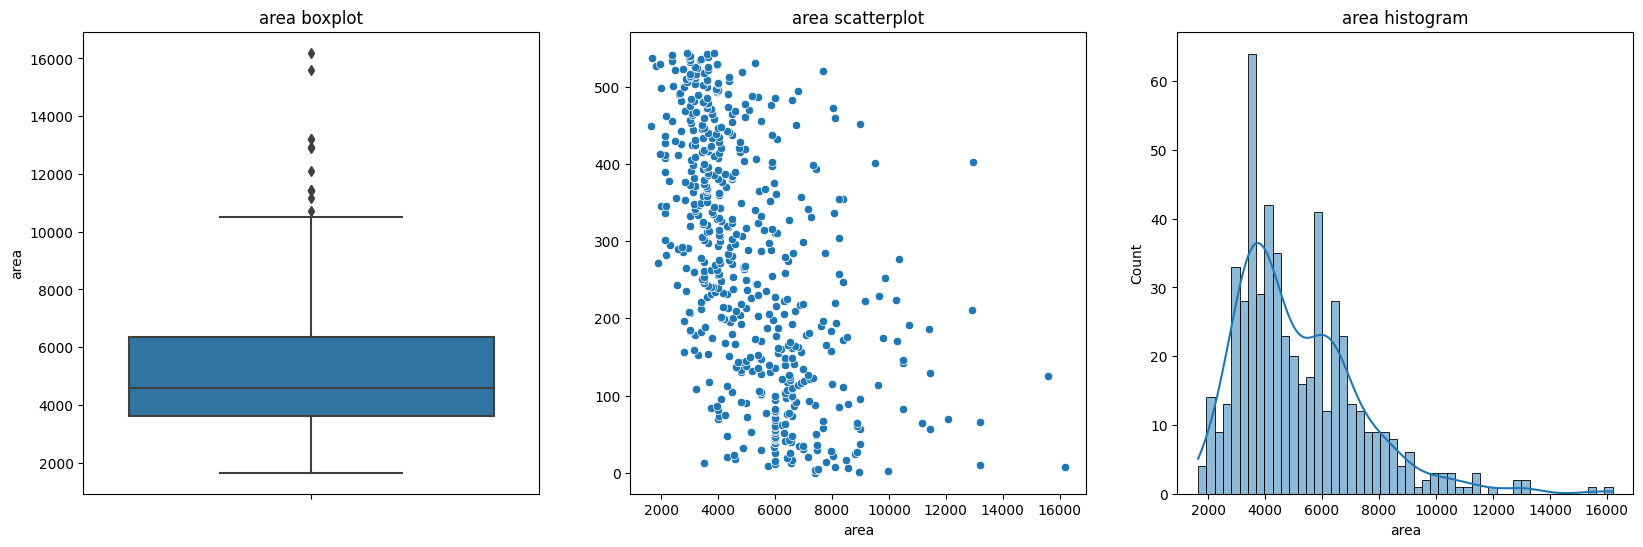

In [ ]:
for c in quantity_cols[:2]:
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    # Boxplot
    sb.boxplot(y=data[c], ax=axs[0])
    axs[0].set_title(c + ' boxplot')

    # Scatterplot
    sb.scatterplot(y=data.index, x=data[c], ax=axs[1])  # Sử dụng index làm trục x
    axs[1].set_title(c + ' scatterplot')

    #Histogram
    sb.histplot(data[c], bins=50, kde =True, ax=axs[2])
    axs[2].set_title(c + ' histogram')

    plt.show()

Biểu đồ phân phối (Boxplot, Scatterplot và Histogram) của hai thuộc tính định lượng (Area và Price)

Dựa vào biểu đồ và phần description bên trên, ta có thể trả lời được câu hỏi đầu tiên về phân phối giá nhà của khách hàng:

Giá nhà trong tập dữ liệu này chủ yếu (hơn 75%) ở mức giá dưới 5.750.000 và hơn 50% số nhà có mức giá bán dưới 4.350.000.
Vậy đa số căn nhà được bán trong bộ dữ liệu này nằm trong khoảng mức giá trung bình trở xuống (từ dưới 6 triệu)

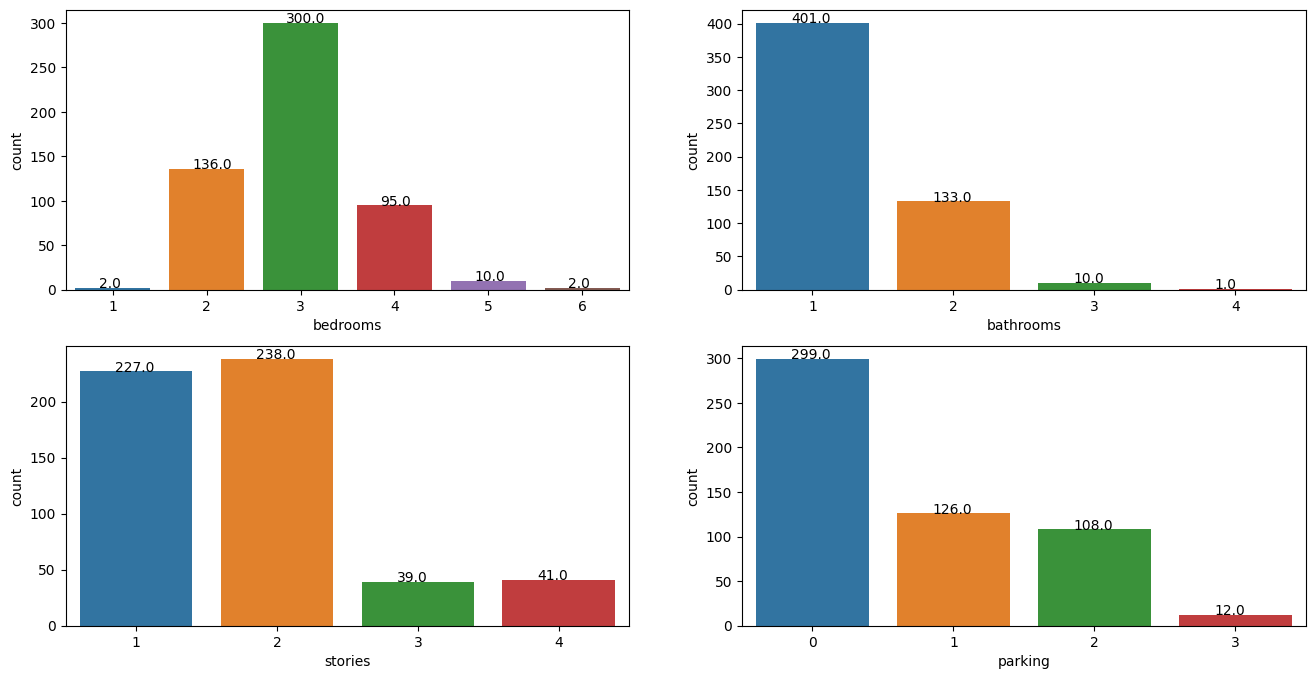

In [ ]:
i = 0
j = 0
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
for c in quantity_cols[2:]:
    # Countplot
    plot = sb.countplot(data, x = data[c],  ax=axs[i][j])
    for p in plot.patches:
      plot.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

    j += 1
    if j == 2:
        i += 1
        j = 0
plt.show()

del i, j

Biểu đồ Countplot của bốn thuộc tính định lượng còn lại (Số phòng ngủ, số phòng tắm, số lầu, số ô giữ xe)

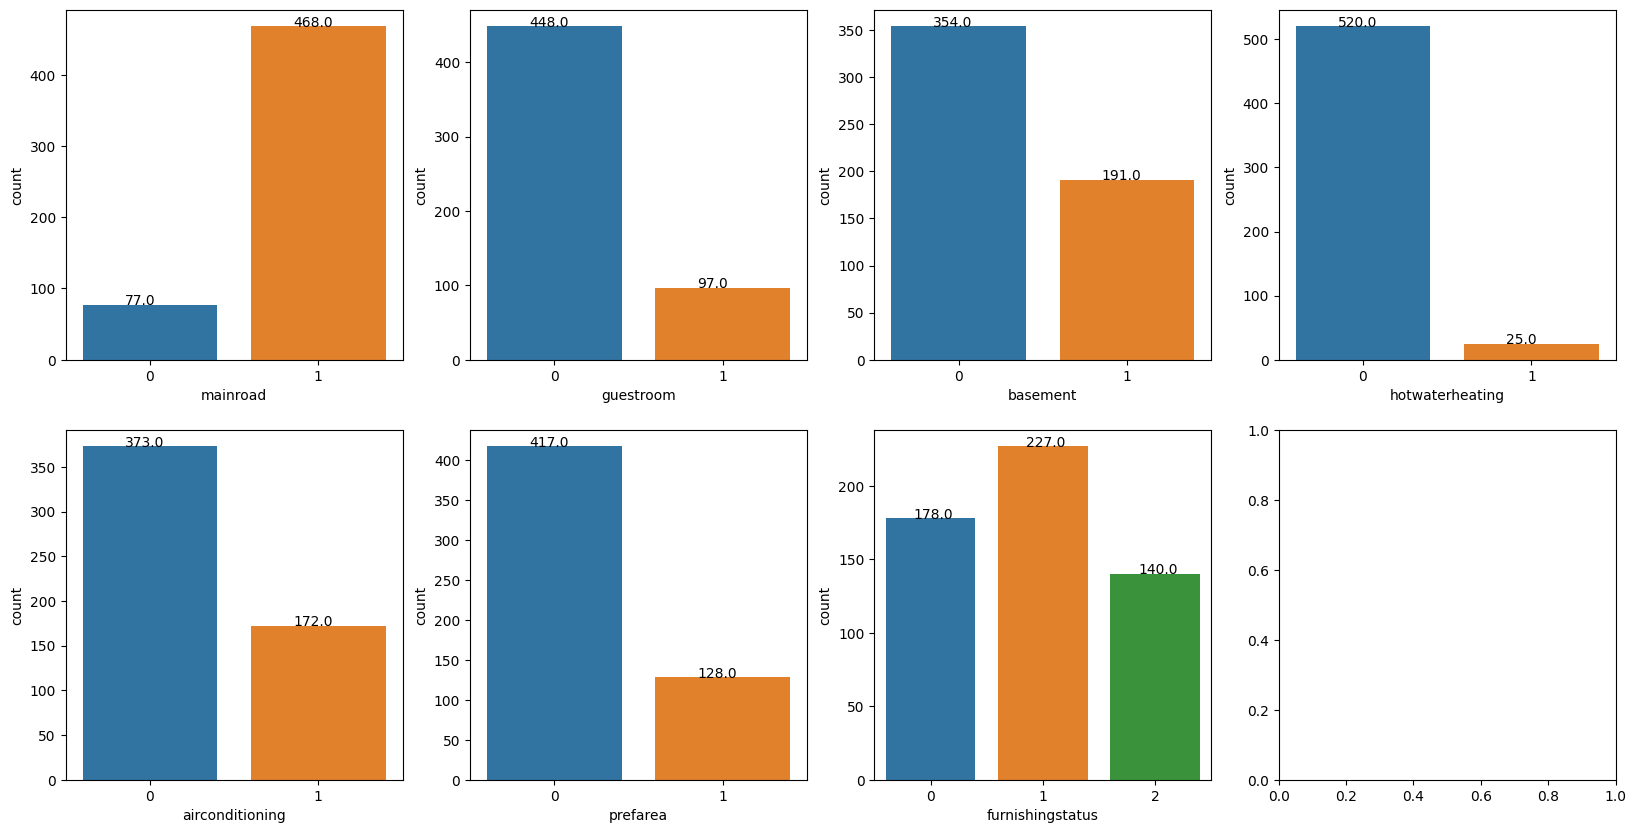

In [ ]:
i = 0
j = 0
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for c in categorical_cols:
    # Countplot
    plot = sb.countplot(data, x = data[c],  ax=axs[i][j])
    for p in plot.patches:
      plot.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

    j += 1
    if j == 4:
        i += 1
        j = 0
plt.show()

del i, j

Biểu đồ Countplot của 7 thuộc tính phân loại (gồm: mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus)

### Xem xét độ tương quan và mối quan hệ giữa các thuộc tính

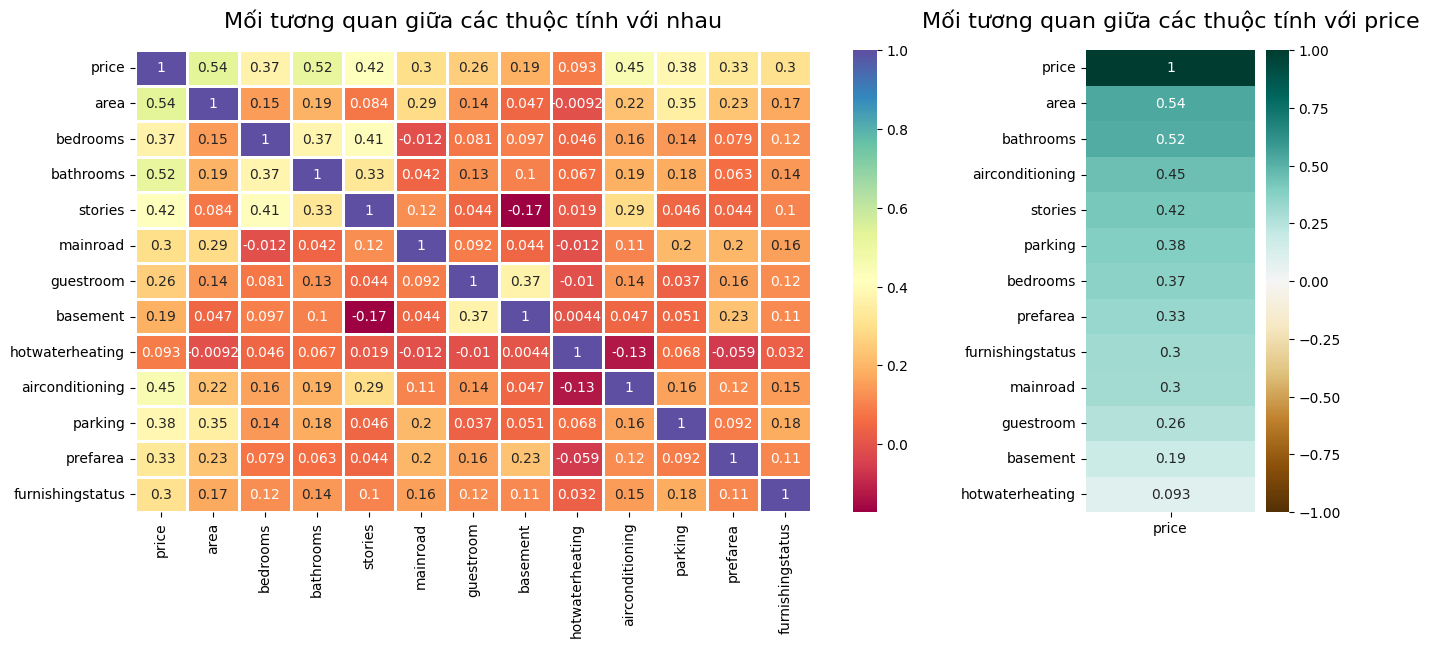

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,6), gridspec_kw={'width_ratios': [8, 2]})
heatmap = sb.heatmap(data.corr(), annot=True, cmap='Spectral', linewidth = 1, ax=axs[0])
heatmap.set_title('Mối tương quan giữa các thuộc tính với nhau', fontdict={'fontsize':16}, pad=16)

subheatmap = sb.heatmap(data.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=axs[1])
subheatmap.set_title('Mối tương quan giữa các thuộc tính với price', fontdict={'fontsize':16}, pad=16)
del heatmap, subheatmap

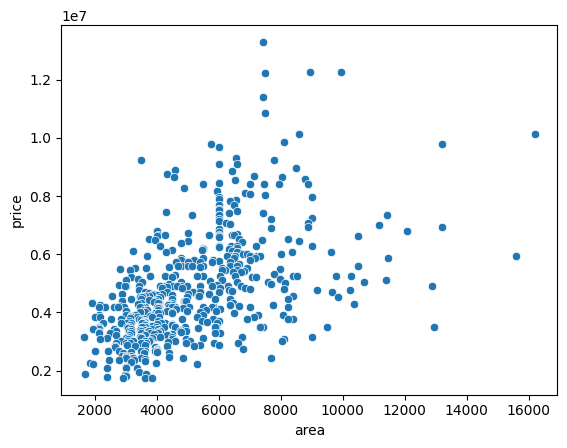

In [ ]:
sb.scatterplot(data=data, y='price', x= data['area'])
plt.show()

Để trả lời câu hỏi liệu có mối quan hệ nào giữa diện tích của căn nhà và giá bán hay không, ta dựa vào biểu đồ scatter trên có thể trả lời được:

Biểu đồ phân tán cho thấy mối quan hệ dương giữa giá nhà và diện tích của nó. Điều này có nghĩa là khi diện tích của một căn nhà tăng lên, giá của nó cũng tăng theo. Mối quan hệ không hoàn toàn tuyến tính do vẫn có một số điểm ngoại lai/ngoại lệ/nhiễu (outliner), nhưng xu hướng chung của mối quan hệ vẫn rõ ràng.

Tóm lại, ta có thể đưa ra giả thuyết để cho câu hỏi thứ hai của khách hàng: giữa diện tích và giá nhà có mối quan hệ tỉ lệ thuận với nhau (mặc dù không rõ ràng và không phải yếu tố chính quyết định đến giá nhà)

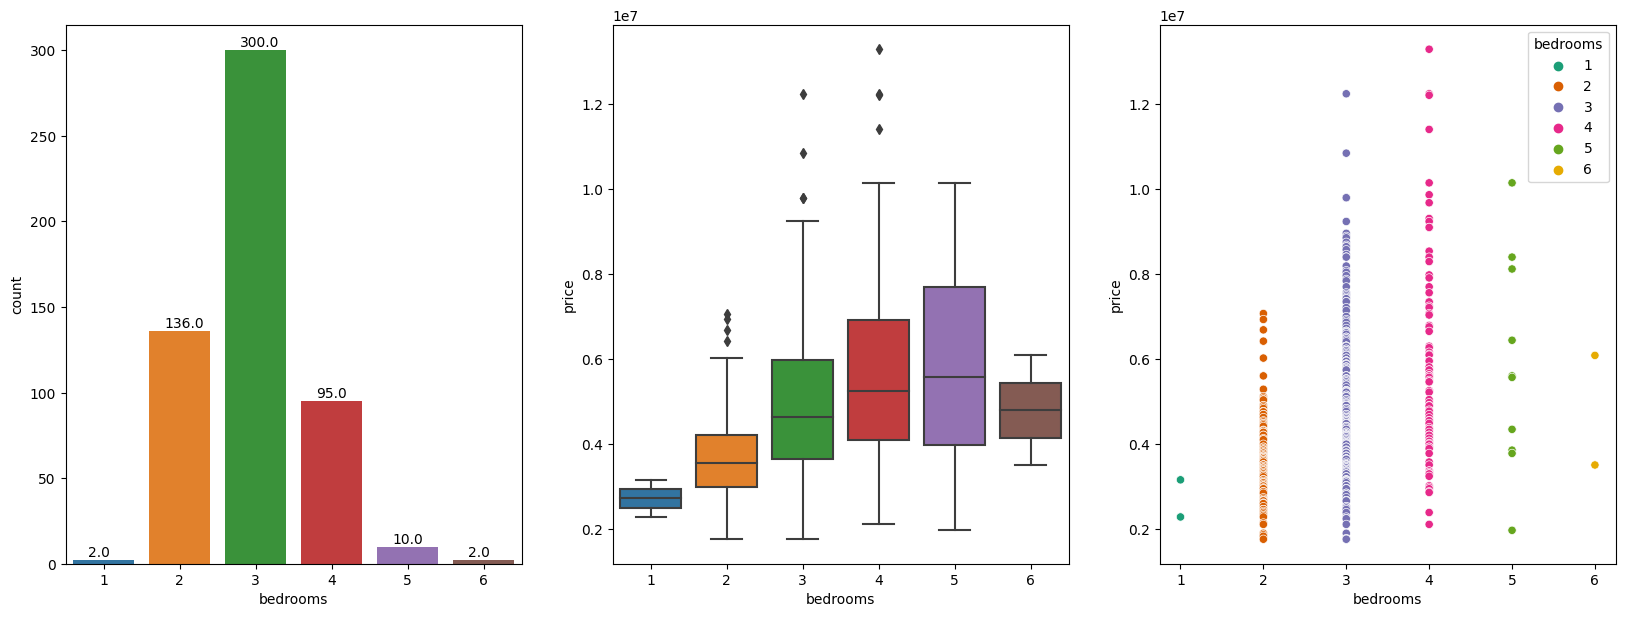

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 7))
# Countplot
plot = sb.countplot(data, x = data['bedrooms'],  ax=axs[0])
for p in plot.patches:
  plot.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height() + 2))

# Boxplot
sb.boxplot(data=data, y='price', x= data['bedrooms'], ax=axs[1])

# Scatterplot
sb.scatterplot(data=data, y='price', x= data['bedrooms'], hue = data['bedrooms'], palette = 'Dark2', ax=axs[2])

plt.show()

Dựa vào ba biểu đồ trên và giá trị tương quan, ta thấy có vẻ như có mối quan hệ tuyến tính giữa số phòng ngủ và giá nhà.

- Biểu đồ cột cho biết phân phối số lượng phòng ngủ bộ dữ liệu.

- Biểu đồ box cho thấy giá trung vị của một căn nhà tăng khi số phòng ngủ tăng.

- Biểu đồ scatter cho thấy có một xu hướng chung của giá tăng khi số phòng ngủ tăng.

Tuy nhiên, cũng có một số dữ liệu không tuyến tính thuộc khoảng từ 5 đến 6 phòng ngủ trong dữ liệu. Điều này cho thấy số phòng ngủ không quyết định được hoàn toàn giá nhà và các yếu tố khác cũng ảnh hưởng đến việc xác định giá của một căn nhà.

Tóm lại, dựa vào 3 biểu đồ trên và giá trị tương quan, ta có thể đưa ra giả thuyết là giá nhà có tương quan dương với số lượng phòng ngủ.

- Giá trung bình của nhà có 4 phòng ngủ: 5729758
- Giá trung bình của nhà có 3 phòng ngủ: 4954598
- Giá trung bình của nhà có 5 phòng ngủ: 5819800
- Giá trung bình của nhà có 2 phòng ngủ: 3632022
- Giá trung bình của nhà có 6 phòng ngủ: 4791500
- Giá trung bình của nhà có 1 phòng ngủ: 2712500


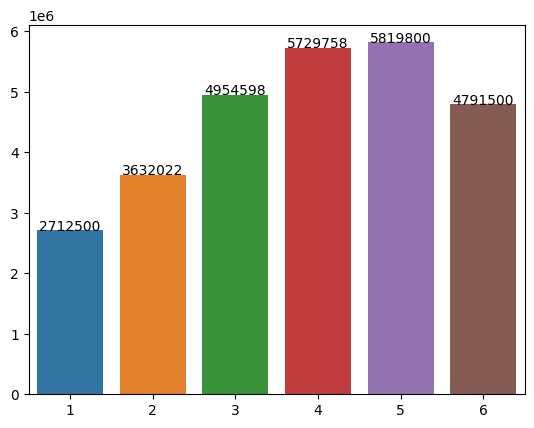

In [ ]:
a = []
for i in data['bedrooms'].unique():
  print(f"- Giá trung bình của nhà có {i} phòng ngủ: {data['price'].loc[data['bedrooms'] == i].mean():.0f}")
  a.append(data['price'].loc[data['bedrooms'] == i].mean())

plot = sb.barplot(data, x = data['bedrooms'].unique(),  y = a)
for p in plot.patches:
  plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.03, p.get_height()+2))
del a, plot

Giá trung bình của các nhà theo từng phòng ngủ được thống kê lại như sau:
- Giá trung bình của nhà có 1 phòng ngủ: 2712500
- Giá trung bình của nhà có 2 phòng ngủ: 3632022
- Giá trung bình của nhà có 3 phòng ngủ: 4954598
- Giá trung bình của nhà có 4 phòng ngủ: 5729758
- Giá trung bình của nhà có 5 phòng ngủ: 5819800
- Giá trung bình của nhà có 6 phòng ngủ: 4791500

Vậy cũng giống như giả thuyết, ta thấy giá của căn nhà tăng dần theo số lượng phòng ngủ (tương quan dương), trừ nhà có 5 đến 6 phòng ngủ có không đủ dữ liệu để đánh giá tổng quan.

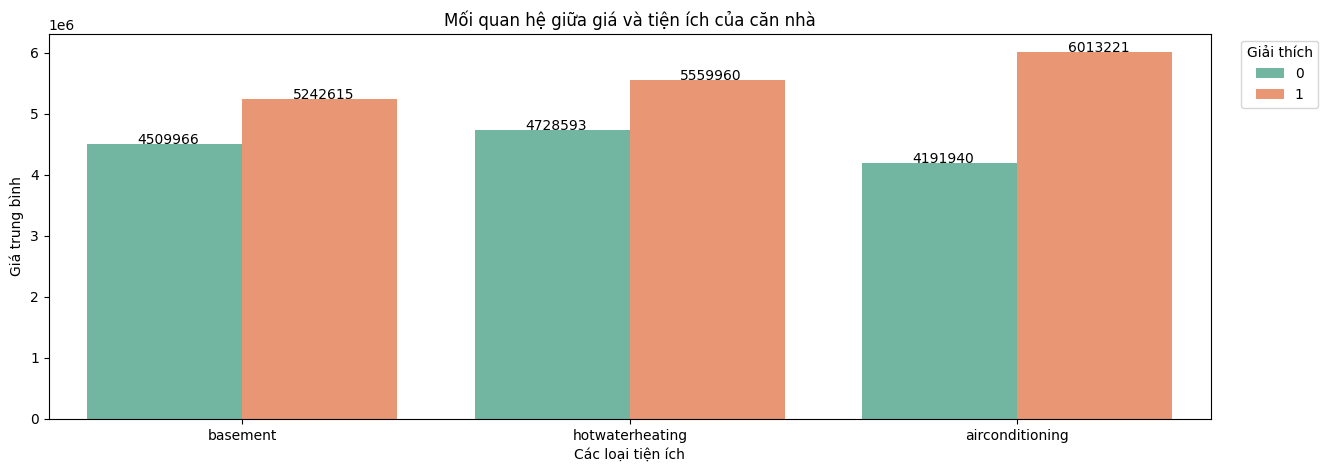

In [ ]:
plt.figure(figsize=(15, 5))
mean_prices = pd.DataFrame()
for c in categorical_cols[2:5]:
    mean_prices_c = data.groupby(c)['price'].mean().reset_index()
    mean_prices_c.insert(loc = 0, column = 'type', value = c)
    mean_prices_c = mean_prices_c.rename(columns={c:"value"})
    mean_prices = pd.concat([mean_prices, mean_prices_c], axis = 0)

plot = sb.barplot(data=mean_prices, x='type', y='price', hue='value', palette='Set2', dodge = True)

for p in plot.patches:
  plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.13, p.get_height()+3))

plt.title('Mối quan hệ giữa giá và tiện ích của căn nhà')
plt.xlabel('Các loại tiện ích')
plt.ylabel('Giá trung bình')
plt.legend(title='Giải thích', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

del mean_prices, plot

Vậy là có chênh lệch lớn (khoảng 19.6%) giữa giá nhà có sẵn đầy đủ tiện ích và nhà không có sẵn tiện ích, cụ thể:

- Đối với nhà không có tầng hầm, có giá trung bình khoảng: 4509966
- Đối với nhà có tầng hầm, giá trung bình khoảng: 5242615

Giá chênh lệch khoảng 732649 (~13.98%) đối với nhà có tầng hầm và nhà không có tầng hầm

- Đối với nhà không có máy nước nóng, có giá trung bình khoảng: 4728593
- Đối với nhà có máy nước nóng, giá trung bình khoảng: 5559960

Giá chênh lệch khoảng 831367 (~14.96%) đối với nhà có máy nước nóng và nhà không có máy nước nóng

- Đối với nhà không có máy lạnh, có giá trung bình khoảng: 4191940
- Đối với nhà có máy lạnh, giá trung bình khoảng: 6013221

Giá chênh lệch khoảng 1821281 (~30.29%) đối với nhà có máy lạnh và nhà không có máy lạnh

Vậy giả thuyết các tiện ích của căn hộ có ảnh hưởng đến giá nhà đã được chắc chắn hơn.

- Giá trung bình của nhà đầy đủ nội thất: 5495696
- Giá trung bình của nhà có một số nội thất: 4907524
- Giá trung bình của nhà chưa có nội thất: 4013831


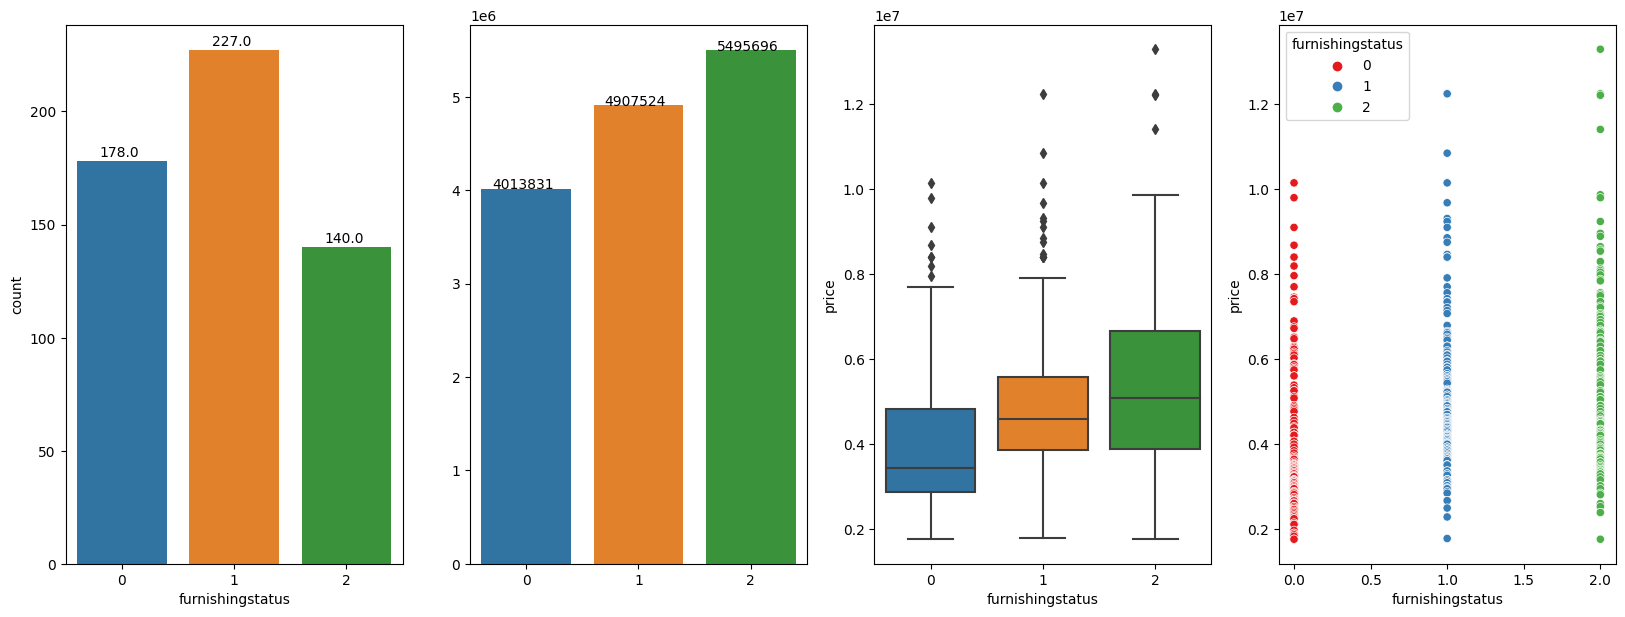

In [ ]:
a = []
for i in data['furnishingstatus'].unique():
  print(f"- Giá trung bình của nhà {'đầy đủ' if i == 2 else 'có một số' if i == 1 else 'chưa có'} nội thất: {data['price'].loc[data['furnishingstatus'] == i].mean():.0f}")
  a.append(data['price'].loc[data['furnishingstatus'] == i].mean())


fig, axs = plt.subplots(1, 4, figsize=(20, 7))
# Countplot
plot = sb.countplot(data, x = data['furnishingstatus'],  ax=axs[0])
for p in plot.patches:
  plot.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height() + 2))


plot = sb.barplot(data, x = data['furnishingstatus'].unique(),  y = a, ax=axs[1])
for p in plot.patches:
  plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height()+2))

# Boxplot
sb.boxplot(data=data, y='price', x= data['furnishingstatus'], ax=axs[2])

# Scatterplot
sb.scatterplot(data=data, y='price', x= data['furnishingstatus'], hue = data['furnishingstatus'], palette = 'Set1', ax=axs[3])


plt.show()
del a, plot

Dựa vào các biểu đồ trên, ta thấy tình trạng nội thất cũng ảnh hưởng nhiều đến giá nhà, cụ thể như sau:
- Giá trung bình của nhà đầy đủ nội thất: 5495696
- Giá trung bình của nhà có một số nội thất: 4907524
- Giá trung bình của nhà chưa có nội thất: 4013831

Chênh lệch giữa các loại nội thất đối với giá nhà như sau
- Chênh lệch giá trị giữa giá trung bình của nhà đầy đủ nội thất và nhà có một số nội thất là 587172 (12.68%).
- Chênh lệch giá trị giữa giá trung bình của nhà đầy đủ nội thất và nhà chưa có nội thất là 1481865 (36.93%).
- Chênh lệch giá trị giữa giá trung bình của nhà có một số nội thất và nhà chưa có nội thất là 894693 (22.30%).

Vậy ta có thể đưa ra giả thuyết rằng tình trạng nội thất có ảnh hưởng trực tiếp đến giá nhà.

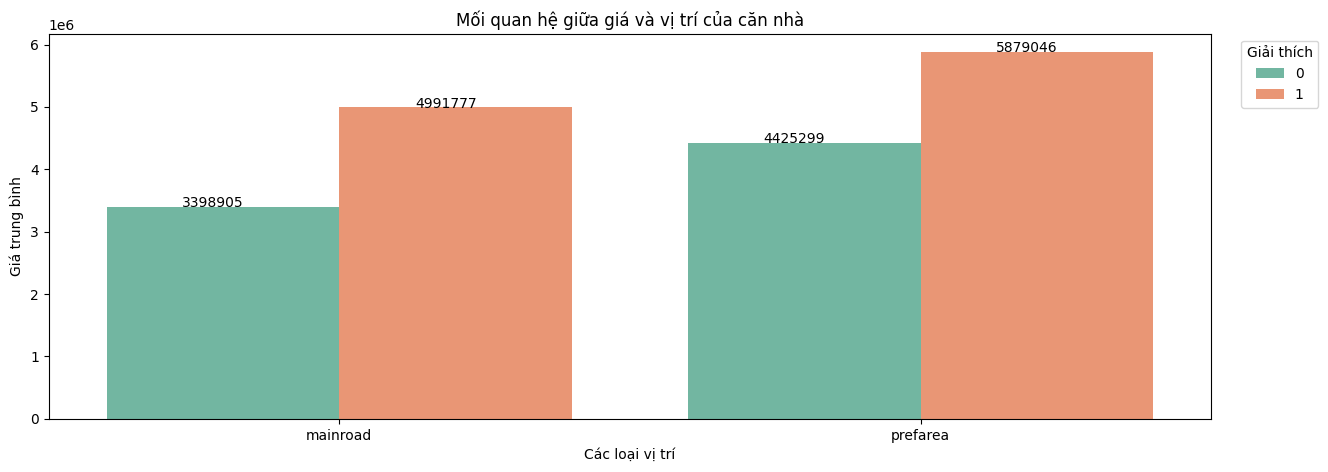

In [ ]:
plt.figure(figsize=(15, 5))
mean_prices = pd.DataFrame()
for c in ['mainroad','prefarea']:
    mean_prices_c = data.groupby(c)['price'].mean().reset_index()
    mean_prices_c.insert(loc = 0, column = 'type', value = c)
    mean_prices_c = mean_prices_c.rename(columns={c:"value"})
    mean_prices = pd.concat([mean_prices, mean_prices_c], axis = 0)

plot = sb.barplot(data=mean_prices, x='type', y='price', hue='value', palette='Set2', dodge = True)

for p in plot.patches:
  plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.13, p.get_height()+3))

plt.title('Mối quan hệ giữa giá và vị trí của căn nhà')
plt.xlabel('Các loại vị trí')
plt.ylabel('Giá trung bình')
plt.legend(title='Giải thích', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

del mean_prices, plot

Vậy là có chênh lệch lớn (khoảng 28.32%) giữa giá nhà có vị trí đẹp (được yêu thích và nằm ở mặt tiền) và nhà không nằm ở vị trí đẹp, cụ thể:

- Đối với nhà không nằm ở mặt tiền đường, có giá trung bình khoảng: 3398905
- Đối với nhà nằm ở mặt tiền đường, giá trung bình khoảng: 4991777

Giá chênh lệch khoảng 1592872 (~31.91%) đối với nhà nằm ở mặt tiền đường và nhà không nằm ở mặt tiền đường

- Đối với nhà không nằm ở vị trí được yêu thích, có giá trung bình khoảng: 4425299
- Đối với nhà nằm ở vị trí được yêu thích, giá trung bình khoảng: 5879046

Giá chênh lệch khoảng 1453747 (~24.73%) đối với nhà nằm ở vị trí được yêu thích và nhà không nằm ở vị trí được yêu thích

Vậy giả thuyết các vị trí của căn hộ có ảnh hưởng đến giá nhà cũng đã được kiểm chứng.

### <h3>Phân tích dữ liệu và kiểm định các giả thuyết</h3>

Tìm về phân phối của giá nhà:
- Câu 1: Giá nhà phân phối trong bộ dữ liệu như thế nào? Có nhiều những căn nhà giá cao hay thấp hơn?

Tìm mối tương quan giữa các biến, như thông tin về căn nhà:
- Câu 2: Liệu có mối quan hệ nào giữa diện tích của căn nhà và giá bán không?
- Câu 3: Giữa số lượng phòng ngủ và giá nhà có mối liên hệ nào không? Thống kê giá trung bình của từng số lượng phòng ngủ.
- Câu 4: Có sẵn tiện ích (máy nước nóng, điều hòa), có tầng hầm ảnh hưởng đến giá của nhà như thế nào? Từng loại tiện ích có chênh lệch trung bình với không có là bao nhiêu?
- Câu 5: Giữa nhà có đầy đủ nội thất, chưa có nội thất hoặc có một sẵn một số nội thất có giá chênh lệch nhau thế nào?

Hoặc sự ảnh hưởng của vị trí đến giá cả:
- Câu 6: Có sự chênh lệch giá nhà giữa hai khu vực yêu thích và không yêu thích không?
- Câu 7: Nhà nằm ở mặt tiền chênh lệch giá trung bình với nhà không nằm ở mặt tiền như thế nào? Và nó có ảnh hưởng trực tiếp đến giá nhà hay không?


Câu 1 đã trả lời phía trên, ta sẽ kiểm định lại giả thuyết cho câu 2 và câu 3 bằng phương pháp kiểm định Pearson, và các câu còn lại bằng ANOVA. Đặc biệt với câu 5 ta sẽ sử dụng thêm phương phân tích Post hoc (Tukey HSD) để xem độ ảnh hưởng riêng lẻ của từng giá trị bên trong đối với giá nhà.

#### Phân tích Pearson cho yêu cầu (câu hỏi) thứ hai và thứ ba (biến giải thích là biến định lượng và biến phản hồi cũng là định lượng)

In [ ]:
# Tính toán hệ số tương quan Pearson
corr, _ = pearsonr(data['area'], data['price'])

print('Hệ số tương quan Pearson giữa area và price: %.3f' % corr)

corr, _ = pearsonr(data['bedrooms'], data['price'])

print('Hệ số tương quan Pearson giữa bedrooms và price: %.3f' % corr)

Hệ số tương quan Pearson giữa area và price: 0.536
Hệ số tương quan Pearson giữa bedrooms và price: 0.366


Hệ số tương quan Pearson nằm trong khoảng từ -1 đến 1. Một giá trị gần 0 cho thấy không có mối tương quan nào, trong khi một giá trị gần 1 (hoặc -1) cho thấy một mối tương quan (dương/âm) mạnh.

Nếu hệ số tương quan là dương, điều này có nghĩa là khi giá trị của một biến tăng, giá trị của biến kia cũng tăng.

Nếu hệ số tương quan là âm, điều này có nghĩa là khi giá trị của một biến tăng, giá trị của biến kia giảm.

Ta thấy, hệ số tương quan Pearson giữa 'area' và 'price' là 0.536 có nghĩa là có một mối tương quan khá mạnh giữa hai biến này, nghĩa là khi 'area' tăng, 'price' cũng có xu hướng tăng (giữa diện tích và giá nhà có mối quan hệ tỉ lệ thuận với nhau).

Và tương tự với hệ số tương quan Pearson giữa 'bedroom' và 'price' là 0.366, nó có nghĩa là giữa hai biến này có một mối tương quan tương đối mạnh, nghĩa là khi 'bedrooms' tăng, 'price' cũng có xu hướng tăng (giữa số lượng phòng ngủ và giá nhà có mối quan hệ tỉ lệ thuận với nhau).

#### Phân tích phương sai ANOVA cho các biến phân loại

- Câu 4: Có sẵn tiện ích (máy nước nóng, điều hòa), có tầng hầm ảnh hưởng đến giá của nhà như thế nào? Từng loại tiện ích có chênh lệch trung bình với không có là bao nhiêu?
- Câu 5: Giữa nhà có đầy đủ nội thất, chưa có nội thất hoặc có một sẵn một số nội thất có giá chênh lệch nhau thế nào?

Hoặc sự ảnh hưởng của vị trí đến giá cả:
- Câu 6: Có sự chênh lệch giá nhà giữa hai khu vực yêu thích và không yêu thích không?
- Câu 7: Nhà nằm ở mặt tiền chênh lệch giá trung bình với nhà không nằm ở mặt tiền như thế nào? Và nó có ảnh hưởng trực tiếp đến giá nhà hay không?

Trả lời cho câu 4, 5, 6 và câu 7 (đã trả lời vế đầu ở phía trên) chúng ta dựa vào các biểu đồ phía trên để đưa ra giả thuyết và để kiểm định lại giả thuyết có chính xác hay không, ta sử dụng phương pháp kiểm định phương sai ANOVA (giả sử khách hàng không cho mức ý nghĩa thông thường thì mặc định ở đây là 0.05).

In [ ]:
for c in categorical_cols[:-1]:
  if c == 'guestroom':    continue
  # Phân chia dữ liệu thành hai nhóm dựa trên giá trị của biến
  yes = data[data[c] == 1]["price"]
  no = data[data[c] == 0]["price"]

  # Thực hiện kiểm định ANOVA
  f_statistic, p_value = f_oneway(yes, no)

  print(f"Kiểm định ANOVA của biến giải thích phân loại {c} với biến phản hồi định lượng 'Price'\n    - F-statistic: {f_statistic}\n    - p-value: {p_value}\n")

Kiểm định ANOVA của biến giải thích phân loại mainroad với biến phản hồi định lượng 'Price'
    - F-statistic: 52.491839182617746
    - p-value: 1.4901041488911911e-12

Kiểm định ANOVA của biến giải thích phân loại basement với biến phản hồi định lượng 'Price'
    - F-statistic: 19.688569160218787
    - p-value: 1.1041051901319109e-05

Kiểm định ANOVA của biến giải thích phân loại hotwaterheating với biến phản hồi định lượng 'Price'
    - F-statistic: 4.744869662643256
    - p-value: 0.029815238966029348

Kiểm định ANOVA của biến giải thích phân loại airconditioning với biến phản hồi định lượng 'Price'
    - F-statistic: 140.16272089218597
    - p-value: 6.310969853532361e-29

Kiểm định ANOVA của biến giải thích phân loại prefarea với biến phản hồi định lượng 'Price'
    - F-statistic: 66.25864622289646
    - p-value: 2.7183744670735454e-15



F-statistic là một số liệu thống kê được sử dụng trong kiểm định ANOVA để đánh giá sự khác biệt giữa các phương sai của các nhóm dữ liệu. Trong ngữ cảnh kiểm định mối tương quan giữa hai thuộc tính, F-statistic đo lường sự chênh lệch giữa các nhóm trong biến phụ thuộc (ví dụ: giá nhà) dựa trên biến độc lập (ví dụ: có hoặc không có basement, có hệ thống điều hòa không khí, vv.).

Nếu F-statistic lớn, điều này có nghĩa là phương sai giữa các nhóm là khác biệt đáng kể, và chúng ta có cơ sở để tin rằng có mối tương quan giữa biến độc lập và biến phụ thuộc. Khi F-statistic nhỏ, điều này có thể chỉ ra rằng sự chênh lệch giữa các nhóm không đủ lớn để coi là có ý nghĩa thống kê.

Và p-value là một xác suất thống kê, đo lường khả năng nhận được kết quả quan sát hoặc kết quả tương tự khi thực hiện kiểm định một lần nữa, nếu không có mối tương quan thực sự. Trong ngữ cảnh của kiểm định ANOVA, p-value thường được sử dụng để đánh giá xem sự khác biệt giữa các nhóm có ý nghĩa thống kê hay không.

Nếu p-value nhỏ hơn một ngưỡng xác định (thường là 0.05), chúng ta có cơ sở để bác bỏ giả thuyết không có mối tương quan giữa các nhóm. Ngược lại, nếu p-value lớn hơn ngưỡng, chúng ta không có đủ bằng chứng để bác bỏ giả thuyết không có mối tương quan.

Tóm lại, F-statistic đo lường sự chênh lệch giữa các nhóm, trong khi p-value đánh giá xem sự chênh lệch đó có ý nghĩa thống kê hay không. Cả hai giá trị này đều quan trọng để đưa ra kết luận về mối tương quan giữa các thuộc tính trong phân tích ANOVA.

Câu 4: Kết quả kiểm định ANOVA của biến giải thích phân loại basement với biến phản hồi định lượng 'price'

    - F-statistic: 19.688569160218787
    - p-value: 1.1041051901319109e-05

- Tỷ lệ F-statistic cho biến 'basement' và 'price' là 19.69. Điều này cho thấy có sự khác biệt đáng kể về giá trị trung bình giữa các nhóm của biến 'basement'. Giá trị F-statistic cao cho thấy sự biến động giữa các nhóm lớn hơn so với sự biến động bên trong mỗi nhóm.

- Giá trị p-value cho biến 'basement' và 'price' là 1.1e-05, nhỏ hơn 0.05 khá nhiều. Điều này cho thấy chúng ta có thể bác bỏ giả thuyết rằng mỗi giá trị trung bình nhóm là bằng nhau. Vì vậy, chúng ta có thể kết luận rằng có mối tương quan đáng kể giữa biến 'basement' và 'price'.


Kết quả kiểm định ANOVA của biến giải thích phân loại hotwaterheating với biến phản hồi định lượng 'price'

    - F-statistic: 4.744869662643256
    - p-value: 0.029815238966029348

- Tỷ lệ F-statistic cho biến 'hotwaterheating' và 'price' là 4.74. Điều này chỉ ra rằng có sự khác biệt trong giá trị trung bình giữa các nhóm của biến 'hotwaterheating'. Tuy nhiên, giá trị F-statistic thấp hơn so với biến 'basement' và 'price', cho thấy sự biến động giữa các nhóm không lớn như biến 'basement'.

- Giá trị p-value cho biến 'hotwaterheating' và 'price' là 0.0298, nhỏ hơn 0.05. Vì vậy, điều này có thể chỉ ra một mối quan hệ tương đối nhẹ giữa hotwaterheating' và 'price'. Tuy nhiên, mối tương quan này có thể không mạnh mẽ như biến 'basement' và 'price' do giá trị F-statistic thấp hơn.


Kết quả kiểm định ANOVA của biến giải thích phân loại airconditioning với biến phản hồi định lượng 'price'

    - F-statistic: 140.16272089218597
    - p-value: 6.310969853532361e-29

- Kết quả này rõ ràng chỉ ra mối liên quan mạnh mẽ giữa việc có hệ thống điều hòa không khí và giá nhà. F-statistic lên đến hơn 140, cho thấy sự chênh lệch là rất đáng kể. Giá trị p-value với 6.31e-29 (xấp xỉ 0) thấp hơn rất nhiều so với mức ý nghĩa 0.05, chứng tỏ rằng sự chênh lệch này không phải do ngẫu nhiên và có ảnh hưởng lớn đến giá nhà.

Câu 6: Kết quả kiểm định ANOVA của biến giải thích phân loại prefarea với biến phản hồi định lượng 'Price'

    - F-statistic: 66.25864622289646
    - p-value: 2.7183744670735454e-15

Kết quả này cho thấy sự ảnh hưởng đáng kể của vị trí đối với giá nhà. F-statistic lớn và p-value thấp (xấp xỉ 0) mang ý nghĩa rằng có sự chênh lệch đáng kể giữa nhà nằm ở vị trí yêu thích và nhà không nằm ở vị trí yêu thích. Do đó, có đủ bằng chứng để khẳng định mối liên quan giữa prefarea và giá nhà.

Câu 7: Em đã nghiên cứu hai biến: "Mainroad" (kết nối với đường chính hay không) và "Price" (giá nhà). Câu hỏi đặt ra ở đây là liệu việc kết nối với đường chính có ảnh hưởng trực tiếp đến giá nhà không?

Kết quả kiểm định ANOVA của biến giải thích phân loại mainroad với biến phản hồi định lượng 'Price':

    - F-statistic: 52.491839182617746
    - p-value: 1.4901041488911911e-12

Kết quả này chứng minh rằng có sự khác biệt đáng kể giữa giá nhà của các ngôi nhà có kết nối với đường chính và những ngôi nhà không có kết nối này. Giá trị F-statistic 52.49 cao, chỉ ra sự chênh lệch đáng kể giữa các nhóm. Đặc biệt, giá trị p-value vô cùng nhỏ (nhỏ hơn 0.05 nhiều), điều này làm cho chúng ta có thể tự tin khẳng định rằng sự khác biệt này không phải là kết quả của sự ngẫu nhiên, mà thực sự có ý nghĩa thống kê.

Câu 5: Đầu tiên ta cần kiểm định ANOVA của biến giải thích phân loại 'furnishingstatus' với biến phản hồi định lượng 'Price'

In [ ]:
# Phân chia dữ liệu thành các nhóm dựa trên giá trị của biến "Furnishing status"
fully_furnished = data[data["furnishingstatus"] == 2]["price"]
semi_furnished = data[data["furnishingstatus"] == 1]["price"]
unfurnished = data[data["furnishingstatus"] == 0]["price"]

# Thực hiện kiểm định ANOVA
f_statistic, p_value = f_oneway(fully_furnished, semi_furnished, unfurnished)
print("F-statistic:", f_statistic)
print("p-value:", p_value)
del fully_furnished, semi_furnished, unfurnished

F-statistic: 28.272068447164575
p-value: 2.0928668857951646e-12


Kết quả này mang lại thông tin quan trọng về mối liên quan giữa tình trạng nội thất và giá nhà. Giá trị F-statistic cao (28.27), cho thấy sự chênh lệch đáng kể giữa các nhóm. Điều này cho ta thấy rằng tình trạng nội thất đóng vai trò quan trọng trong quá trình định giá bất động sản.

Quan trọng hơn, giá trị p-value cực kỳ thấp (chỉ 2.09e-12). Điều này cho thấy khả năng rất cao sự khác biệt giữa các nhóm không phải do ngẫu nhiên. Trong ngữ cảnh này, chúng ta có thể tin tưởng rằng tình trạng nội thất ảnh hưởng đến giá nhà.

Để đi sâu vào phân tích xem cụ thể những trạng thái nội thất nào có sự ảnh hưởng trong giá nhà, mình tiến hành phân tích sâu hơn bằng cách sử dụng phân tích Tukey HSD .

In [ ]:
# Thực hiện phân tích Post hoc (Tukey HSD)
tukey_results = pairwise_tukeyhsd(data['price'], data['furnishingstatus'], alpha=0.05)

# In kết quả phân tích Post hoc
print("\nTukey HSD Post hoc analysis:")
print(tukey_results)


Tukey HSD Post hoc analysis:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
     0      1  893692.7684    0.0  474128.5294 1313257.0074   True
     0      2 1481864.5393    0.0 1008458.9036 1955270.1751   True
     1      2  588171.7709 0.0064  137821.9769 1038521.5649   True
------------------------------------------------------------------


group1, group2, meandiff: Các cặp nhóm được so sánh và giá trị trung bình của sự chênh lệch giữa chúng. Ví dụ, giữa group 0 và group 1, meandiff là 893,692.7684.

p-adj: Giá trị p hiệu chỉnh (adjusted p-value), đây là giá trị p đã được hiệu chỉnh để giảm nguy cơ sai sót loại 1 khi thực hiện nhiều so sánh. Các giá trị p dưới 0.05 thường được coi là có ý nghĩa thống kê.

lower, upper: là cặp giới hạn trên dưới của khoảng tin cậy (trong bài này là 95%) (ước lượng phạm vi có thể chứa giá trị trung bình thực sự của hiệu số giữa các nhóm). Điều này cung cấp một cách để đánh giá mức độ chắc chắn xung quanh ước lượng. Nếu khoảng tin cậy không chứa giá trị 0, thì sự chênh lệch được xem xét là ý nghĩa.

reject: Cho biết liệu chúng ta có thể bác bỏ giả thuyết không có sự khác biệt hay không (reject hay not reject). Nếu giá trị là "True," chúng ta có thể bác bỏ giả thuyết không có sự khác biệt, và nếu là "False," chúng ta không thể bác bỏ giả thuyết.

Vậy ý nghĩa của giá trị trong kết quả ở trên là:

Sự khác biệt trung bình giữa nhóm nhà đầy đủ nội thất và nhóm nhà bán nội thất là 588171.77 (nghĩa là nhóm nhà đầy đủ nội thất có giá trung bình cao hơn so với nhóm nhà bán nội thất). Tương tự với nhóm nhà đầy đủ nội thất có giá trung bình cao hơn 1481864.54 so với nhóm nhà chưa được trang bị nội thất và nhóm nhà được trang bị một số nội thất có giá trung bình cao hơn 893692.77 so với nhóm nhà chưa được trang bị nội thất.

"p-adj" là giá trị p được điều chỉnh để kiểm soát sai lầm loại I (thầy gọi là mức ý nghĩa).

"lower" và "upper" là cặp giới hạn phạm vi có thể chứa giá trị trung bình thực sự của hiệu số giữa các nhóm.

"reject" = True ở tất cả các cặp cho biết chúng ta có thể từ chối giả thuyết rằng không có sự khác biệt giữa các nhóm.

Và dựa vào kết quả trên, chúng ta có thể kết luận rằng có sự khác biệt đáng kể trong giá nhà giữa các trạng thái nội thất của căn nhà (nhóm nhà đầy đủ nội thất, nhóm nhà bán nội thất, và chưa được trang bị nội thất). Và các cặp nhóm đều có sự khác biệt đáng kể trong giá nhà.

## <h2>Huấn luyện mô hình</h2>

In [ ]:
# data['total rooms'] = data['bedrooms'] + data['bathrooms'] + data['stories']

# columns_to_drop = ['bedrooms', 'bathrooms', 'stories']
# data = data.drop(columns=columns_to_drop)

# skewed_features = ['price', 'area']
# data[skewed_features] = np.log1p(data[skewed_features])

In [ ]:
X = data.drop('price', axis= 1)
y = data['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2023)

### Mô hình hồi quy

#### Mô hình hồi quy tuyến tính

##### Linearn Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.score(X_test,y_test)

0.6176462177047577

In [ ]:
y_pred_lr = lr.predict(X_test)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_lr))
print('Mean square error:', mean_squared_error(y_test, y_pred_lr))
print('Root mean square error:', mean_squared_error(y_test, y_pred_lr, squared=False))
print('r2:', r2_score(y_test,y_pred_lr))

Mean absolute error:  880938.9219086765
Mean square error: 1357744249685.0261
Root mean square error: 1165222.832631178
r2: 0.6176462177047577


In [ ]:
params_lr = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1,1,2],
    'positive': [True, False]
}

In [ ]:
cv_lr = GridSearchCV(lr, param_grid=params_lr, cv= 4,scoring='neg_mean_squared_error', return_train_score=True)
cv_lr.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [None, -1, 1, 2],
                         'positive': [True, False]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
params_lr_best = cv_lr.best_params_

lr_best = LinearRegression(**params_lr_best)
lr_best.fit(X_train,y_train)
lr_best.score(X_train,y_train)

0.6911331678727535

In [ ]:
y_pred_lr_best = lr_best.predict(X_test)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_lr_best))
print('Mean square error:', mean_squared_error(y_test, y_pred_lr_best))
print('Root mean square error:', mean_squared_error(y_test, y_pred_lr_best, squared=False))
print('r2:', r2_score(y_test,y_pred_lr_best))

Mean absolute error:  877538.0464264036
Mean square error: 1358129368630.8674
Root mean square error: 1165388.0764066824
r2: 0.6175377645217595


In [ ]:
print('Tham số tốt nhất cho Linear Regression là: ', cv_lr.best_params_)

Tham số tốt nhất cho Linear Regression là:  {'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': True}


In [ ]:
df_optimized_params = pd.DataFrame(list(params_lr_best.items()), columns=['Parameter', 'Value'])

# Display the DataFrame
print(df_optimized_params)

       Parameter  Value
0         copy_X   True
1  fit_intercept  False
2         n_jobs   None
3       positive   True


<h2>Trước khi tối ưu:</h2>
<table border="1">
    <tr>
        <th>Metric</th>
        <th>Value</th>
    </tr>
    <tr>
        <td>Mean Absolute Error</td>
        <td>880938.9219086765</td>
    </tr>
    <tr>
        <td>Mean Square Error</td>
        <td>1357744249685.0261</td>
    </tr>
    <tr>
        <td>Root Mean Square Error</td>
        <td>1165222.832631178</td>
    </tr>
    <tr>
        <td>R-square (r2)</td>
        <td>0.6176462177047577</td>
    </tr>
</table>

<br>

<h2>Sau khi tối ưu:</h2>
<table border="1">
    <tr>
        <th>Metric</th>
        <th>Value</th>
    </tr>
    <tr>
        <td>Mean Absolute Error</td>
        <td>877538.0464264036</td>
    </tr>
    <tr>
        <td>Mean Square Error</td>
        <td>1358129368630.8674</td>
    </tr>
    <tr>
        <td>Root Mean Square Error</td>
        <td>1165388.0764066824</td>
    </tr>
    <tr>
        <td>R-square (r2)</td>
        <td>0.6175377645217595</td>
    </tr>
</table>


ValueError: ignored

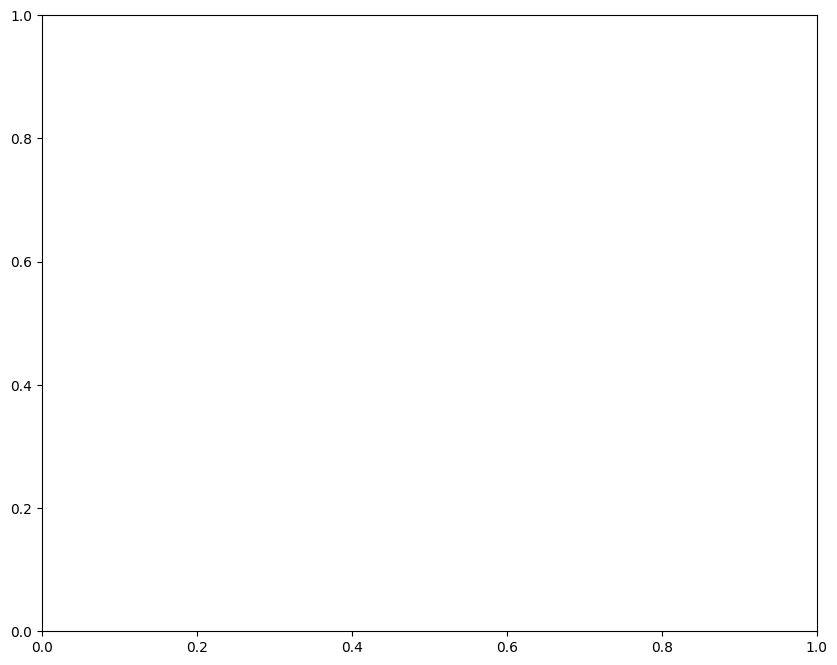

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(y_test)
plt.plot(X_test,y_pred_lr_best, color ='red')

#### Mô hình cây quyết định

##### Decesion Tree

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

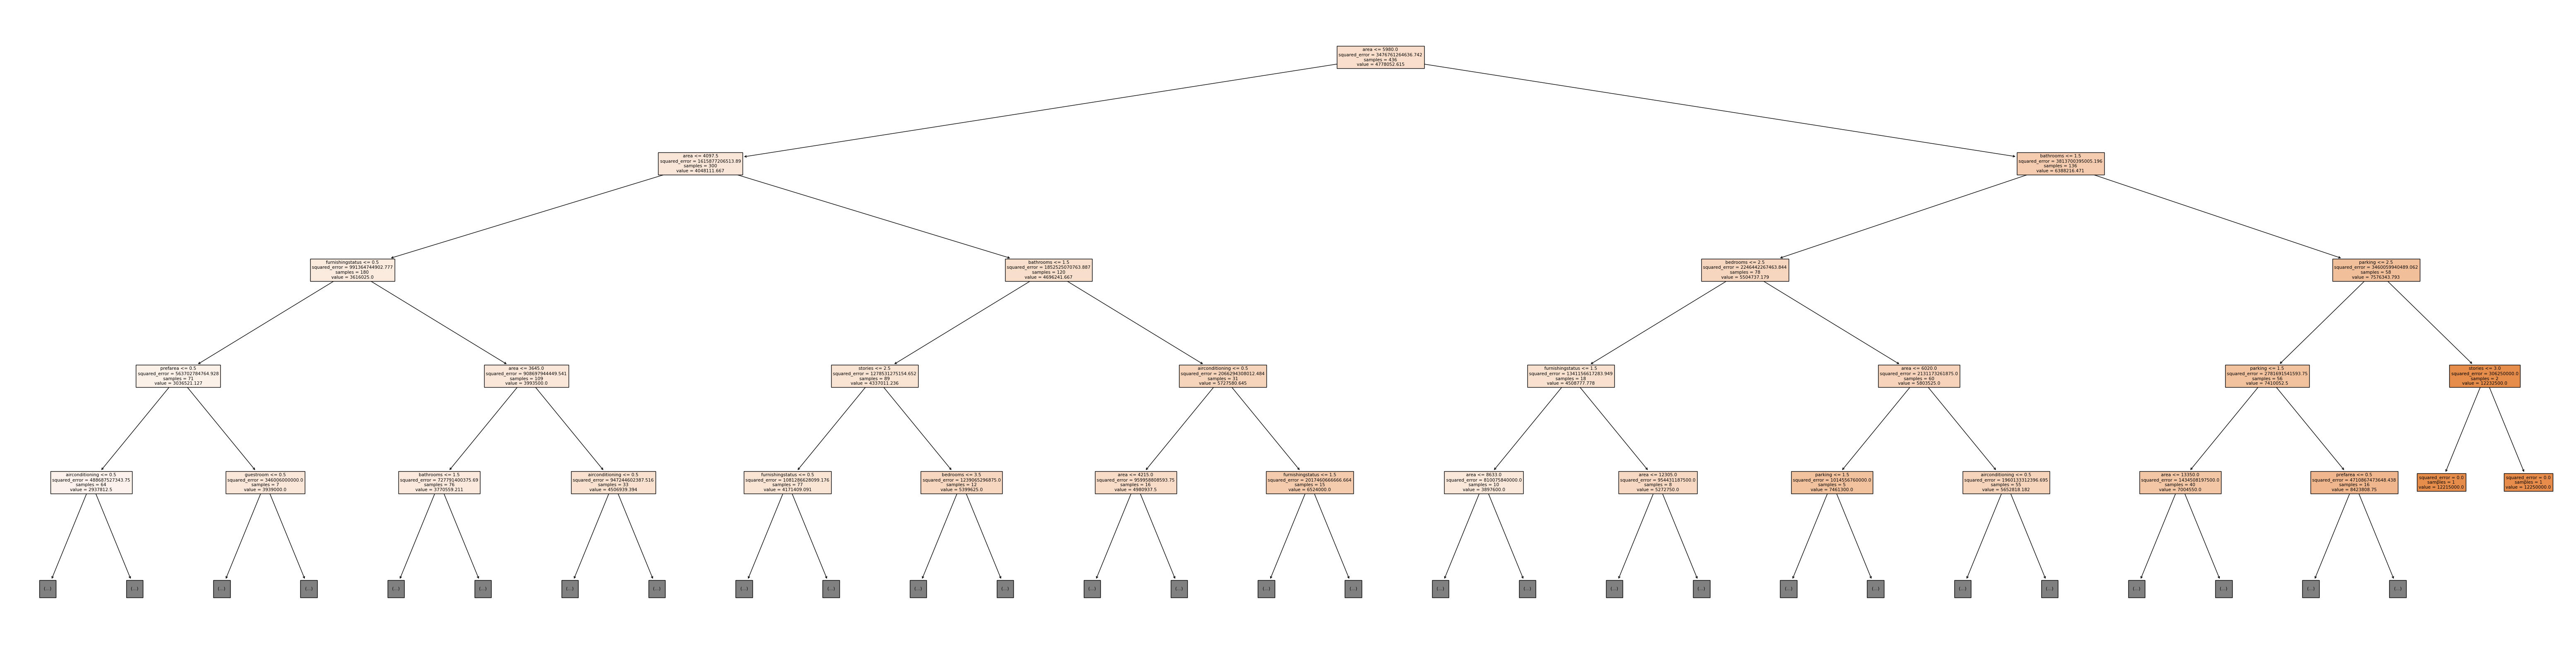

In [ ]:
plt.figure(figsize =(80,20))
plot_tree(dt,feature_names=X_train.columns, max_depth=4, filled=True)
plt.show()

In [ ]:
dt.score(X_train,y_train)

0.999201401724444

In [ ]:
y_pred_dt = dt.predict(X_test)
print(f'Mean absolute error: ', mean_absolute_error(y_test, y_pred_dt))
print('Mean square error:', mean_squared_error(y_test, y_pred_dt))
print('Root mean square error:', mean_squared_error(y_test, y_pred_dt, squared=False))
print('r2:', r2_score(y_test,y_pred_dt))

Mean absolute error:  1236821.6513761468
Mean square error: 3669918424161.468
Root mean square error: 1915703.114827939
r2: -0.033484170909693134


In [ ]:
import math
# tính số max depth tối đa(tuần 11 có công thức)
X = 545
n_max = math.log(X) / math.log(2)

print("Giá trị n_max:", n_max)

Giá trị n_max: 9.090112419664289


In [ ]:
params_dt = {
    'max_depth':range(1,10),
    'criterion': ['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter': ['best','random'],
    'min_samples_split': [2,3,],
    'min_samples_leaf': [2,3,4],
    'max_features': ['sqrt','log2',None],
    'random_state': [None, 2023],
    'max_leaf_nodes': [None,2,3]
}
cv_dt = GridSearchCV(dt, param_grid=params_dt, scoring='neg_mean_squared_error', cv= 4, return_train_score=True)
cv_dt.fit(X_train, y_train)
print(cv_dt.best_params_)

{'criterion': 'squared_error', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': None, 'splitter': 'random'}


In [ ]:
params_dt_best = cv_dt.best_params_

dt_best = DecisionTreeRegressor(**params_dt_best)
dt_best.fit(X_train,y_train)
dt_best.score(X_train,y_train)

0.7096379297294992

In [ ]:
y_pred_dt_best = dt_best.predict(X_test)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_dt_best))
print('Mean square error:', mean_squared_error(y_test, y_pred_dt_best))
print('Root mean square error:', mean_squared_error(y_test, y_pred_dt_best, squared=False))
print('r2:', r2_score(y_test,y_pred_dt_best))

Mean absolute error:  969355.504587156
Mean square error: 1905847104931.1926
Root mean square error: 1380524.2138156043
r2: 0.4632952051051389


In [ ]:
dt_optimized_params = pd.DataFrame(list(params_dt_best.items()), columns=['Parameter', 'Value'])

# Display the DataFrame
print('Tham số tối ưu nhất của mô hình Random Forest là:\n',dt_optimized_params)

In [ ]:
plt.figure(figsize =(80,20))
plot_tree(dt_best,feature_names=X_train.columns, max_depth=4, filled=True)
plt.show()

##### Random Forest

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_rf = rf.predict(X_test)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_rf))
print('Mean square error:', mean_squared_error(y_test, y_pred_rf))
print('Root mean square error:', mean_squared_error(y_test, y_pred_rf, squared=False))
print('r2:', r2_score(y_test,y_pred_rf))

In [ ]:
params_rf = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': range(1,10),
    'max_leaf_nodes': [3, 6, 9],
}

In [ ]:
cv_rf = GridSearchCV(rf, param_grid=params_rf, scoring='neg_mean_squared_error', cv= 4, return_train_score=True)
cv_rf.fit(X_train, y_train)
print(cv_rf.best_params_)

{'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 9, 'n_estimators': 50}


In [ ]:
params_rf_best = cv_rf.best_params_

rf_best = RandomForestRegressor(**params_rf_best)
rf_best.fit(X_train,y_train)
rf_best.score(X_train,y_train)

0.6678837754776796

In [ ]:
y_pred_rf_best = rf_best.predict(X_test)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_rf_best))
print('Mean square error:', mean_squared_error(y_test, y_pred_rf_best))
print('Root mean square error:', mean_squared_error(y_test, y_pred_rf_best, squared=False))
print('r2:', r2_score(y_test,y_pred_rf_best))

Mean absolute error:  959721.6928333795
Mean square error: 1636332897089.9946
Root mean square error: 1279192.2830794416
r2: 0.5391929868665376


In [ ]:
rf_optimized_params = pd.DataFrame(list(params_rf_best.items()), columns=['Parameter', 'Value'])

# Display the DataFrame
print('Tham số tối ưu nhất của mô hình Random Forest là:\n',rf_optimized_params)

##### XGBoost

In [ ]:
xgb_best = xgb.XGBRegressor()
xgb_best.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb.predict(X_test)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_xgb))
print('Mean square error:', mean_squared_error(y_test, y_pred_xgb))
print('Root mean square error:', mean_squared_error(y_test, y_pred_xgb, squared=False))
print('r2:', r2_score(y_test,y_pred_xgb))

In [ ]:
params_xgb = {
              'learning_rate': [0.01, 0.1, 0.2],
              'n_estimators': [100, 200, 300],
              'max_depth': range(1,10),
              'min_child_weight': [1, 2, 3],
              'subsample': [0.8, 0.9, 1.0],
              'colsample_bytree': [0.8, 0.9, 1.0],
              'gamma': [ 0.1, 0.2]
              }


In [ ]:
cv_xgb = GridSearchCV(xgb_best, param_grid=params_xgb, scoring='neg_mean_squared_error', cv= 4, return_train_score=True)
cv_xgb.fit(X_train, y_train)
print(cv_xgb.best_params_)

In [ ]:
params_xgb_best = cv_xgb.best_params_

xgb_best = xgb.XGBRegressor(**params_xgb_best)
xgb_best.fit(X_train,y_train)
xgb_best.score(X_train,y_train)

In [ ]:
y_pred_xgb_best = rf_best.predict(X_test)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_xgb_best))
print('Mean square error:', mean_squared_error(y_test, y_pred_xgb_best))
print('Root mean square error:', mean_squared_error(y_test, y_pred_xgb_best, squared=False))
print('r2:', r2_score(y_test,y_pred_xgb_best))

In [ ]:
xgb_optimized_params = pd.DataFrame(list(params_xgb_best.items()), columns=['Parameter', 'Value'])

# Display the DataFrame
print('Tham số tối ưu nhất của mô hình Xgboost là:\n',xgb_optimized_params)

#### Mô hình K Nearest Neighbor

 ##### K-Nearest Neighbors

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

In [ ]:
y_pred_knn = knn.predict(X_test)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_knn))
print('Mean square error:', mean_squared_error(y_test, y_pred_knn))
print('Root mean square error:', mean_squared_error(y_test, y_pred_knn, squared=False))
print('r2:', r2_score(y_test,y_pred_knn))

In [ ]:
knn.score(X_test, y_test)

In [ ]:
params_knn = {
    'n_neighbors': range(1, 21, 2),
    'weights': ['uniform', 'distance',None],
    'algorithm': ['auto','ball_tree','kd_tree','brute'],
    'p':[1,2,3,4],
    'metric': ['cityblock','euclidean', 'minkowski', 'manhattan','l1','l2']
}

In [ ]:
cv_knn = GridSearchCV(knn, param_grid=params_knn, cv= 4,scoring='neg_mean_squared_error', return_train_score=True)
cv_knn.fit(X_train,y_train)

In [ ]:
print('Tham số tốt nhất cho mô hình KNN là: ', cv_knn.best_params_)

In [ ]:
params_knn_best = cv_knn.best_params_

knn_best = KNeighborsRegressor(**params_knn_best)
knn_best.fit(X_train,y_train)
knn_best.score(X_train,y_train)

In [ ]:
y_pred_knn_best = knn_best.predict(X_test)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_knn_best))
print('Mean square error:', mean_squared_error(y_test, y_pred_knn_best))
print('Root mean square error:', mean_squared_error(y_test, y_pred_knn_best, squared=False))
print('r2:', r2_score(y_test,y_pred_knn_best))

In [ ]:
knn_optimized_params = pd.DataFrame(list(params_knn_best.items()), columns=['Parameter', 'Value'])

# Display the DataFrame
print('Tham số tối ưu nhất của mô hình KNN là:\n',knn_optimized_params)

### Mô hình phân loại

In [ ]:
price_percentiles = data['price'].quantile([0, 0.33, 0.66, 1])

# Tạo một hàm để xác định nhóm cho từng giá trị "price"
def categorize_price(price):
    if price <= price_percentiles.iloc[1]:
        return "Thấp"
    elif price <= price_percentiles.iloc[2]:
        return "Trung bình"
    else:
        return "Cao"

# Áp dụng hàm để tạo cột "Price_Group" cho DataFrame
data['Price_Group'] = data['price'].apply(categorize_price)

In [ ]:
data['Price_Group'] = labelEncoder.fit_transform(data['Price_Group'])

In [ ]:
X = data.drop(['Price_Group','price'], axis= 1)
y = data['Price_Group']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2023)

#### Mô hình hồi quy Logistic

##### Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.score(X_test,y_test)

0.5871559633027523

In [ ]:
y_pred_lr = lr.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

In [ ]:
params_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [100, 10, 1.0, 0.1, 0.01],
    'fit_intercept': [True, False],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']

}

In [ ]:
cv_lr = GridSearchCV(lr, param_grid=params_lr, cv= 4,scoring='neg_mean_squared_error', return_train_score=True)
cv_lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
params_lr_best = cv_lr.best_params_

lr_best = LogisticRegression(**params_lr_best)
lr_best.fit(X_train,y_train)
lr_best.score(X_test, y_test)

0.6880733944954128

In [ ]:
y_pred_lr_best = lr_best.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_lr_best))
print(classification_report(y_test, y_pred_lr_best))

Accuracy: 0.6880733944954128
              precision    recall  f1-score   support

           0       0.67      0.82      0.74        34
           1       0.79      0.77      0.78        39
           2       0.59      0.47      0.52        36

    accuracy                           0.69       109
   macro avg       0.68      0.69      0.68       109
weighted avg       0.68      0.69      0.68       109



In [ ]:
df_optimized_params = pd.DataFrame(list(params_lr_best.items()), columns=['Parameter', 'Value'])

# Display the DataFrame
print(df_optimized_params)

       Parameter      Value
0              C          1
1  fit_intercept       True
2        penalty         l2
3         solver  newton-cg


In [ ]:
print('Trước khi tối ưu:\n')
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print('Sau khi tối ưu:\n')
print('Accuracy:', accuracy_score(y_test, y_pred_lr_best))
print(classification_report(y_test, y_pred_lr_best))

Trước khi tối ưu:

Accuracy: 0.5871559633027523
              precision    recall  f1-score   support

           0       0.55      0.85      0.67        34
           1       0.72      0.67      0.69        39
           2       0.45      0.25      0.32        36

    accuracy                           0.59       109
   macro avg       0.57      0.59      0.56       109
weighted avg       0.58      0.59      0.56       109

Sau khi tối ưu:

Accuracy: 0.6880733944954128
              precision    recall  f1-score   support

           0       0.67      0.82      0.74        34
           1       0.79      0.77      0.78        39
           2       0.59      0.47      0.52        36

    accuracy                           0.69       109
   macro avg       0.68      0.69      0.68       109
weighted avg       0.68      0.69      0.68       109



#### Mô hình cây quyết định

##### Decesion Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.6697247706422018
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        34
           1       0.79      0.69      0.74        39
           2       0.53      0.53      0.53        36

    accuracy                           0.67       109
   macro avg       0.67      0.67      0.67       109
weighted avg       0.67      0.67      0.67       109



In [ ]:
import math
# tính số max depth tối đa(tuần 11 có công thức)
X = 545
n_max = math.log(X) / math.log(2)

print("Giá trị n_max:", n_max)

Giá trị n_max: 9.090112419664289


In [ ]:
params_dt = {
    'max_depth':range(1,10),
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
cv_dt = GridSearchCV(dt, param_grid=params_dt, scoring='neg_mean_squared_error', cv= 4, return_train_score=True)
cv_dt.fit(X_train, y_train)
print(cv_dt.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5}


In [ ]:
params_dt_best = cv_dt.best_params_

dt_best = DecisionTreeClassifier(**params_dt_best)
dt_best.fit(X_train,y_train)
dt_best.score(X_test, y_test)

0.6422018348623854

In [ ]:
y_pred_dt_best = dt_best.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_dt_best))
print(classification_report(y_test, y_pred_dt_best))

Accuracy: 0.6422018348623854
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        34
           1       0.69      0.69      0.69        39
           2       0.50      0.47      0.49        36

    accuracy                           0.64       109
   macro avg       0.64      0.64      0.64       109
weighted avg       0.64      0.64      0.64       109



In [ ]:
dt_optimized_params = pd.DataFrame(list(params_dt_best.items()), columns=['Parameter', 'Value'])

# Display the DataFrame
print('Tham số tối ưu nhất của mô hình Random Forest là:\n',dt_optimized_params)

Tham số tối ưu nhất của mô hình Random Forest là:
           Parameter Value
0         criterion  gini
1         max_depth     4
2  min_samples_leaf     5


In [ ]:
print('Trước khi tối ưu:\n')
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print('Sau khi tối ưu:\n')
print('Accuracy:', accuracy_score(y_test, y_pred_dt_best))
print(classification_report(y_test, y_pred_dt_best))

Trước khi tối ưu:

Accuracy: 0.6605504587155964
              precision    recall  f1-score   support

           0       0.66      0.79      0.72        34
           1       0.78      0.72      0.75        39
           2       0.53      0.47      0.50        36

    accuracy                           0.66       109
   macro avg       0.66      0.66      0.66       109
weighted avg       0.66      0.66      0.66       109

Sau khi tối ưu:

Accuracy: 0.6422018348623854
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        34
           1       0.69      0.69      0.69        39
           2       0.50      0.47      0.49        36

    accuracy                           0.64       109
   macro avg       0.64      0.64      0.64       109
weighted avg       0.64      0.64      0.64       109



##### Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf.predict(X_test)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_rf))
print('Mean square error:', mean_squared_error(y_test, y_pred_rf))
print('Root mean square error:', mean_squared_error(y_test, y_pred_rf, squared=False))
print('r2:', r2_score(y_test,y_pred_rf))

In [ ]:
params_rf = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': range(1,10),
    'max_leaf_nodes': [3, 6, 9],
}

In [ ]:
cv_rf = GridSearchCV(rf, param_grid=params_rf, scoring='neg_mean_squared_error', cv= 4, return_train_score=True)
cv_rf.fit(X_train, y_train)
print(cv_rf.best_params_)

{'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 9, 'n_estimators': 50}


In [ ]:
params_rf_best = cv_rf.best_params_

rf_best = RandomForestRegressor(**params_rf_best)
rf_best.fit(X_train,y_train)
rf_best.score(X_train,y_train)

0.6678837754776796

In [ ]:
y_pred_rf_best = rf_best.predict(X_test)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_rf_best))
print('Mean square error:', mean_squared_error(y_test, y_pred_rf_best))
print('Root mean square error:', mean_squared_error(y_test, y_pred_rf_best, squared=False))
print('r2:', r2_score(y_test,y_pred_rf_best))

Mean absolute error:  959721.6928333795
Mean square error: 1636332897089.9946
Root mean square error: 1279192.2830794416
r2: 0.5391929868665376


In [ ]:
rf_optimized_params = pd.DataFrame(list(params_rf_best.items()), columns=['Parameter', 'Value'])

# Display the DataFrame
print('Tham số tối ưu nhất của mô hình Random Forest là:\n',rf_optimized_params)

##### XGBoost

In [ ]:
xgb_best = xgb.XGBRegressor()
xgb_best.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb.predict(X_test)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_xgb))
print('Mean square error:', mean_squared_error(y_test, y_pred_xgb))
print('Root mean square error:', mean_squared_error(y_test, y_pred_xgb, squared=False))
print('r2:', r2_score(y_test,y_pred_xgb))

In [ ]:
params_xgb = {
              'learning_rate': [0.01, 0.1, 0.2],
              'n_estimators': [100, 200, 300],
              'max_depth': range(1,10),
              'min_child_weight': [1, 2, 3],
              'subsample': [0.8, 0.9, 1.0],
              'colsample_bytree': [0.8, 0.9, 1.0],
              'gamma': [ 0.1, 0.2]
              }


In [ ]:
cv_xgb = GridSearchCV(xgb_best, param_grid=params_xgb, scoring='neg_mean_squared_error', cv= 4, return_train_score=True)
cv_xgb.fit(X_train, y_train)
print(cv_xgb.best_params_)

In [ ]:
params_xgb_best = cv_xgb.best_params_

xgb_best = xgb.XGBRegressor(**params_xgb_best)
xgb_best.fit(X_train,y_train)
xgb_best.score(X_train,y_train)

In [ ]:
y_pred_xgb_best = rf_best.predict(X_test)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_xgb_best))
print('Mean square error:', mean_squared_error(y_test, y_pred_xgb_best))
print('Root mean square error:', mean_squared_error(y_test, y_pred_xgb_best, squared=False))
print('r2:', r2_score(y_test,y_pred_xgb_best))

In [ ]:
xgb_optimized_params = pd.DataFrame(list(params_xgb_best.items()), columns=['Parameter', 'Value'])

# Display the DataFrame
print('Tham số tối ưu nhất của mô hình Xgboost là:\n',xgb_optimized_params)

#### Mô hình KNN

 ##### K-Nearest Neighbors

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

In [ ]:
y_pred_knn = knn.predict(X_test)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_knn))
print('Mean square error:', mean_squared_error(y_test, y_pred_knn))
print('Root mean square error:', mean_squared_error(y_test, y_pred_knn, squared=False))
print('r2:', r2_score(y_test,y_pred_knn))

In [ ]:
knn.score(X_test, y_test)

In [ ]:
params_knn = {
    'n_neighbors': range(1, 21, 2),
    'weights': ['uniform', 'distance',None],
    'algorithm': ['auto','ball_tree','kd_tree','brute'],
    'p':[1,2,3,4],
    'metric': ['cityblock','euclidean', 'minkowski', 'manhattan','l1','l2']
}

In [ ]:
cv_knn = GridSearchCV(knn, param_grid=params_knn, cv= 4,scoring='neg_mean_squared_error', return_train_score=True)
cv_knn.fit(X_train,y_train)

In [ ]:
print('Tham số tốt nhất cho mô hình KNN là: ', cv_knn.best_params_)

In [ ]:
params_knn_best = cv_knn.best_params_

knn_best = KNeighborsRegressor(**params_knn_best)
knn_best.fit(X_train,y_train)
knn_best.score(X_train,y_train)

In [ ]:
y_pred_knn_best = knn_best.predict(X_test)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_knn_best))
print('Mean square error:', mean_squared_error(y_test, y_pred_knn_best))
print('Root mean square error:', mean_squared_error(y_test, y_pred_knn_best, squared=False))
print('r2:', r2_score(y_test,y_pred_knn_best))

In [ ]:
knn_optimized_params = pd.DataFrame(list(params_knn_best.items()), columns=['Parameter', 'Value'])

# Display the DataFrame
print('Tham số tối ưu nhất của mô hình KNN là:\n',knn_optimized_params)

### Trước khi tối ưu

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

In [ ]:
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print(f'Mean absolute error {name}: ', mean_absolute_error(y_test, y_pred))
  print(f'Mean squared error {name}: ', mean_squared_error(y_test, y_pred))
  print(f'Root mean squared error {name}: ', mean_squared_error(y_test, y_pred,squared= False))
  print(f'R-square {name}: ', r2_score(y_test,y_pred))
  print('\n')

### Tối ưu mô hình

In [ ]:
models_Tree = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor()
}

In [ ]:
params = {
    'max_depth':range(1,10)
  }
for name, model in models_Tree.items():
  model.fit(X_train,y_train)
  cv = GridSearchCV(model, param_grid=params, scoring='r2', cv= 4, return_train_score=True)
  cv.fit(X_train, y_train)
  print(f'Tham số tốt nhất của mô hình {name}:',cv.best_params_)
  cv_results_df = pd.DataFrame(cv.cv_results_)
  ax = plt.axes()
  ax.errorbar(cv_results_df['param_max_depth'],cv_results_df['mean_train_score'], yerr=cv_results_df['std_train_score'], label='Mean $\pm$ 1 SD training scores')
  ax.errorbar(cv_results_df['param_max_depth'], cv_results_df['mean_test_score'], yerr=cv_results_df['std_test_score'], label='Mean $\pm$ 1 SD testing scores')
  ax.legend()
  plt.xlabel('max_depth')
  plt.ylabel('r2')
  plt.show()

#### Decesion Tree

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

In [ ]:
dt.score(X_train,y_train)

In [ ]:
y_pred_dt = dt.predict(X_test)
print(f'Mean absolute error: ', mean_absolute_error(y_test, y_pred_dt))
print('Mean square error:', mean_squared_error(y_test, y_pred_dt))
print('Root mean square error:', mean_squared_error(y_test, y_pred_dt, squared=False))
print('r2:', r2_score(y_test,y_pred_dt))

In [ ]:
import math
# tính số max depth tối đa(tuần 11 có công thức)
X = 545
n_max = math.log(X) / math.log(2)

print("Giá trị n_max:", n_max)

In [ ]:
params_dt = {
    'max_depth':range(1,10),
    'criterion': ['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter': ['best','random'],
    'min_samples_split': [2,3,],
    'min_samples_leaf': [2,3,4],
    'max_features': ['sqrt','log2',None],
    'random_state': [None, 2023],
    'max_leaf_nodes': [None,2,3]
}
cv_dt = GridSearchCV(dt, param_grid=params_dt, scoring='neg_mean_squared_error', cv= 4, return_train_score=True)
cv_dt.fit(X_train, y_train)
print(cv_dt.best_params_)

In [ ]:
params_dt_best = cv_dt.best_params_

dt_best = DecisionTreeRegressor(**params_dt_best)
dt_best.fit(X_train,y_train)
dt_best.score(X_train,y_train)

In [ ]:
y_pred_dt_best = dt_best.predict(X_test)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_dt_best))
print('Mean square error:', mean_squared_error(y_test, y_pred_dt_best))
print('Root mean square error:', mean_squared_error(y_test, y_pred_dt_best, squared=False))
print('r2:', r2_score(y_test,y_pred_dt_best))

#### Random Forest

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
params_rf = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': range(1,10),
    'max_leaf_nodes': [3, 6, 9],
}

In [ ]:
cv_rf = GridSearchCV(rf, param_grid=params_rf, scoring='neg_mean_squared_error', cv= 4, return_train_score=True)
cv_rf.fit(X_train, y_train)
print(cv_rf.best_params_)

In [ ]:
params_rf_best = cv_rf.best_params_

rf_best = RandomForestRegressor(**params_rf_best)
rf_best.fit(X_train,y_train)
rf_best.score(X_train,y_train)

In [ ]:
y_pred_rf_best = rf_best.predict(X_test)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_rf_best))
print('Mean square error:', mean_squared_error(y_test, y_pred_rf_best))
print('Root mean square error:', mean_squared_error(y_test, y_pred_rf_best, squared=False))
print('r2:', r2_score(y_test,y_pred_rf_best))

#### XGBoost

In [ ]:
xgb_best = xgb.XGBRegressor()
xgb_best.fit(X_train,y_train)

In [ ]:
params_xgb = {
              'learning_rate': [0.01, 0.1, 0.2],
              'n_estimators': [100, 200, 300],
              'max_depth': range(1,10),
              'min_child_weight': [1, 2, 3],
              'subsample': [0.8, 0.9, 1.0],
              'colsample_bytree': [0.8, 0.9, 1.0],
              'gamma': [ 0.1, 0.2]
              }


In [ ]:
cv_xgb = GridSearchCV(xgb_best, param_grid=params_xgb, scoring='neg_mean_squared_error', cv= 4, return_train_score=True)
cv_xgb.fit(X_train, y_train)
print(cv_xgb.best_params_)

In [ ]:
params_xgb_best = cv_xgb.best_params_

xgb_best = xgb.XGBRegressor(**params_xgb_best)
xgb_best.fit(X_train,y_train)
xgb_best.score(X_train,y_train)

In [ ]:
y_pred_rf_best = rf_best.predict(X_test)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_rf_best))
print('Mean square error:', mean_squared_error(y_test, y_pred_rf_best))
print('Root mean square error:', mean_squared_error(y_test, y_pred_rf_best, squared=False))
print('r2:', r2_score(y_test,y_pred_rf_best))

 #### K-Nearest Neighbors

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

In [ ]:
knn.score(X_test, y_test)

In [ ]:
params_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance',None],
    'algorithm': ['auto','ball_tree','kd_tree','brute'],
    'p':[1,2,3,4],
    'metric': ['cityblock','euclidean', 'minkowski', 'manhattan','l1','l2']
}

In [ ]:
cv_knn = GridSearchCV(knn, param_grid=params_knn, cv= 4,scoring='neg_mean_squared_error', return_train_score=True)
cv_knn.fit(X_train,y_train)

In [ ]:
print('Tham số tốt nhất cho mô hình KNN là: ', cv_knn.best_params_)

In [ ]:
params_knn_best = cv_knn.best_params_

knn_best = KNeighborsRegressor(**params_knn_best)
knn_best.fit(X_train,y_train)
knn_best.score(X_train,y_train)

In [ ]:
y_pred_lr_best = lr_best.predict(X_test)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_lr_best))
print('Mean square error:', mean_squared_error(y_test, y_pred_lr_best))
print('Root mean square error:', mean_squared_error(y_test, y_pred_lr_best, squared=False))
print('r2:', r2_score(y_test,y_pred_lr_best))

### Sau khi tối ưu tham số các mô hình

In [ ]:
models_best = {
    'Decision Tree': DecisionTreeRegressor(**params_dt_best),
    'Random Forest': RandomForestRegressor(**params_rf_best),
    'XGBoost': xgb.XGBRegressor(**params_xgb_best),
    'Linear Regression': LinearRegression(**params_lr_best),
    'K-Nearest Neighbors': KNeighborsRegressor(**params_knn_best)
}

In [ ]:
for name, model_best in models_best.items():
  model_best.fit(X_train, y_train)
  y_pred_best = model_best.predict(X_test)

  print(f'Mean absolute error {name}: ', mean_absolute_error(y_test, y_pred_best))
  print(f'Mean squared error {name}: ', mean_squared_error(y_test, y_pred_best))
  print(f'Root mean squared error {name}: ', mean_squared_error(y_test, y_pred_best,squared= False))
  print(f'R-square {name}: ', r2_score(y_test,y_pred_best))
  print('\n')

## <h2>Đánh giá và kết luận</h2>

### <h3>Đánh giá</h3>

Kết quả của các mô hình khi chưa tối ưu:

<table border="1">
    <tr>
        <th>Mô hình</th>
        <th>Mean absolute error</th>
        <th>Mean squared error</th>
        <th>Root mean squared error</th>
        <th>R-square</th>
    </tr>
    <tr>
        <td>Decision Tree</td>
        <td>1275061.5596330275</td>
        <td>3843135807854.1284</td>
        <td>1960391.7485681602</td>
        <td>-0.08226384486488691</td>
    </tr>
    <tr>
        <td>Random Forest</td>
        <td>949314.865443425</td>
        <td>1723652693431.8247</td>
        <td>1312879.5426206568</td>
        <td>0.5146028960535629</td>
    </tr>
    <tr>
        <td>XGBoost</td>
        <td>959815.0756880734</td>
        <td>1888477115563.8022</td>
        <td>1374218.729156244</td>
        <td>0.4681867604437755</td>
    </tr>
    <tr>
        <td>Linear Regression</td>
        <td>880938.9219086765</td>
        <td>1357744249685.0261</td>
        <td>1165222.832631178</td>
        <td>0.6176462177047577</td>
    </tr>
    <tr>
        <td>K-Nearest Neighbors</td>
        <td>1265091.6330275228</td>
        <td>3002717595788.477</td>
        <td>1732835.1323159619</td>
        <td>0.15440597138927992</td>
    </tr>
</table>


Kết quả của các mô hình sau khi tối ưu tham số
<table border="1">
    <tr>
        <th>Mô hình</th>
        <th>Mean absolute error</th>
        <th>Mean squared error</th>
        <th>Root mean squared error</th>
        <th>R-square</th>
    </tr>
    <tr>
        <td>Decision Tree</td>
        <td>1058567.0989195923</td>
        <td>2138604733915.922</td>
        <td>1462396.9139450213</td>
        <td>0.3977484279259835</td>
    </tr>
    <tr>
        <td>Random Forest</td>
        <td>956045.3591140845</td>
        <td>1671869700629.5227</td>
        <td>1293008.0048590275</td>
        <td>0.529185482693956</td>
    </tr>
    <tr>
        <td>XGBoost</td>
        <td>864978.5252293578</td>
        <td>1445276831873.504</td>
        <td>1202196.6693821372</td>
        <td>0.5929962043597572</td>
    </tr>
    <tr>
        <td>Linear Regression</td>
        <td>877538.0464264036</td>
        <td>1358129368630.8674</td>
        <td>1165388.0764066824</td>
        <td>0.6175377645217595</td>
    </tr>
    <tr>
        <td>K-Nearest Neighbors</td>
        <td>1220289.9490316003</td>
        <td>3012138276660.279</td>
        <td>1735551.2889742784</td>
        <td>0.15175301744455483</td>
    </tr>
</table>

### <h3>Kết luận</h3>